## Pellet and Meal Analysis and Distribution

In [1]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
import paths
from preprocessing import read_csv_clean

### Control Group

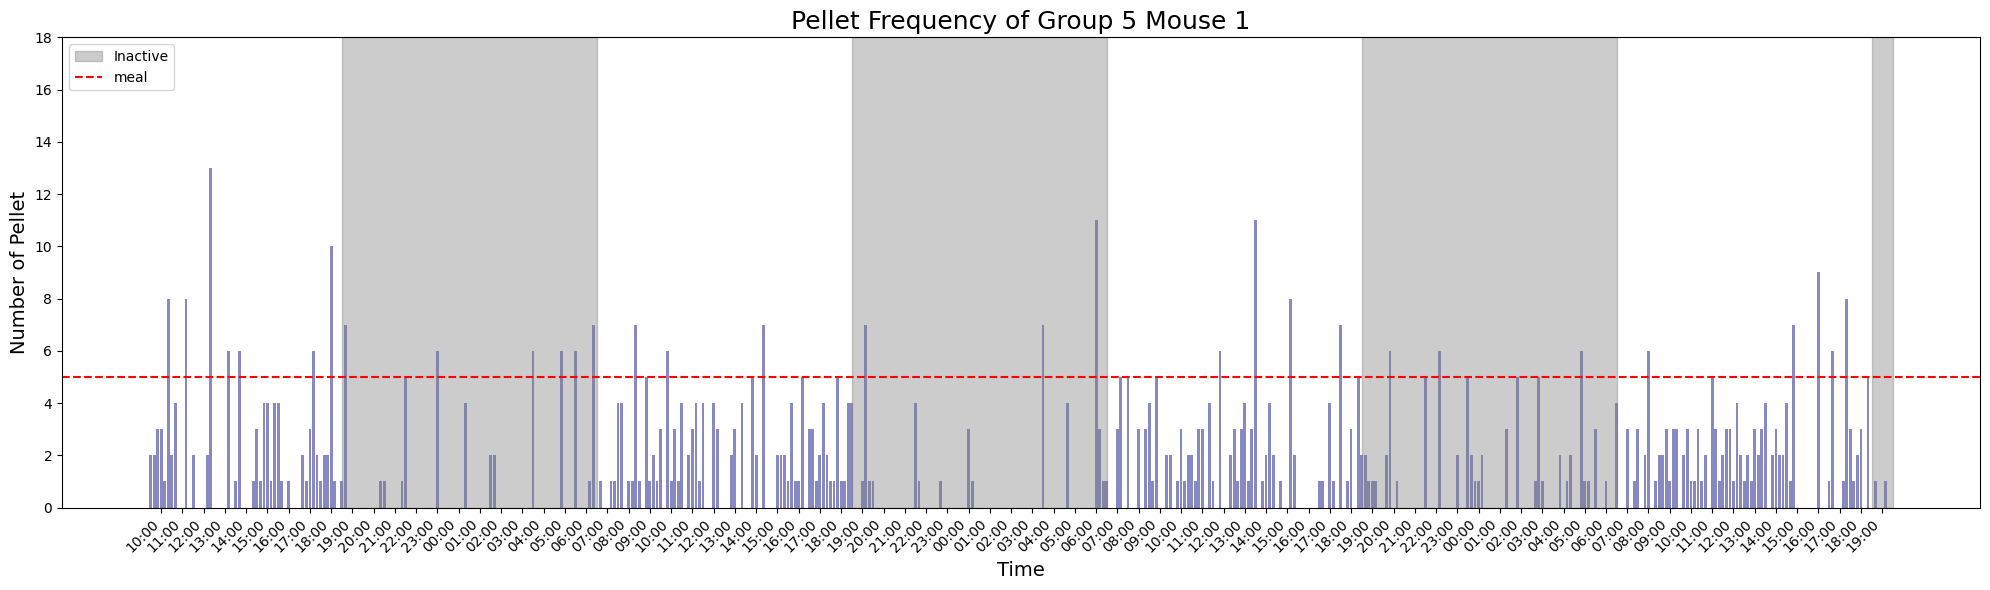

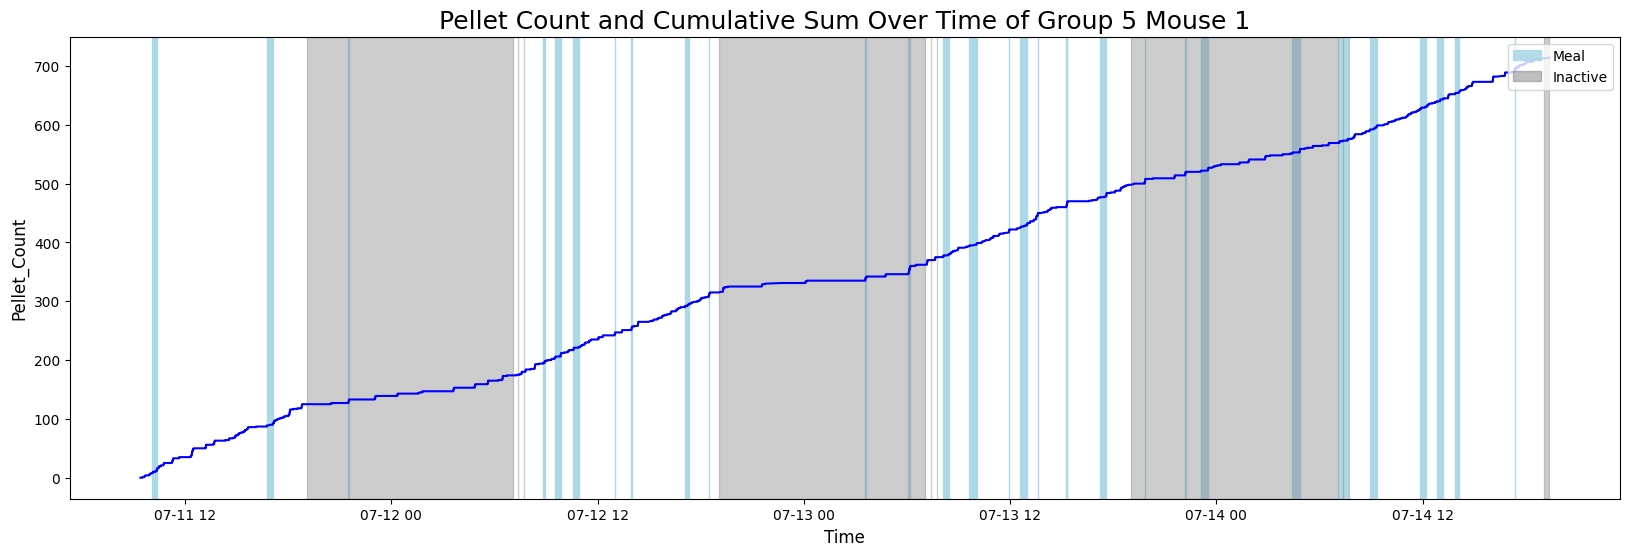

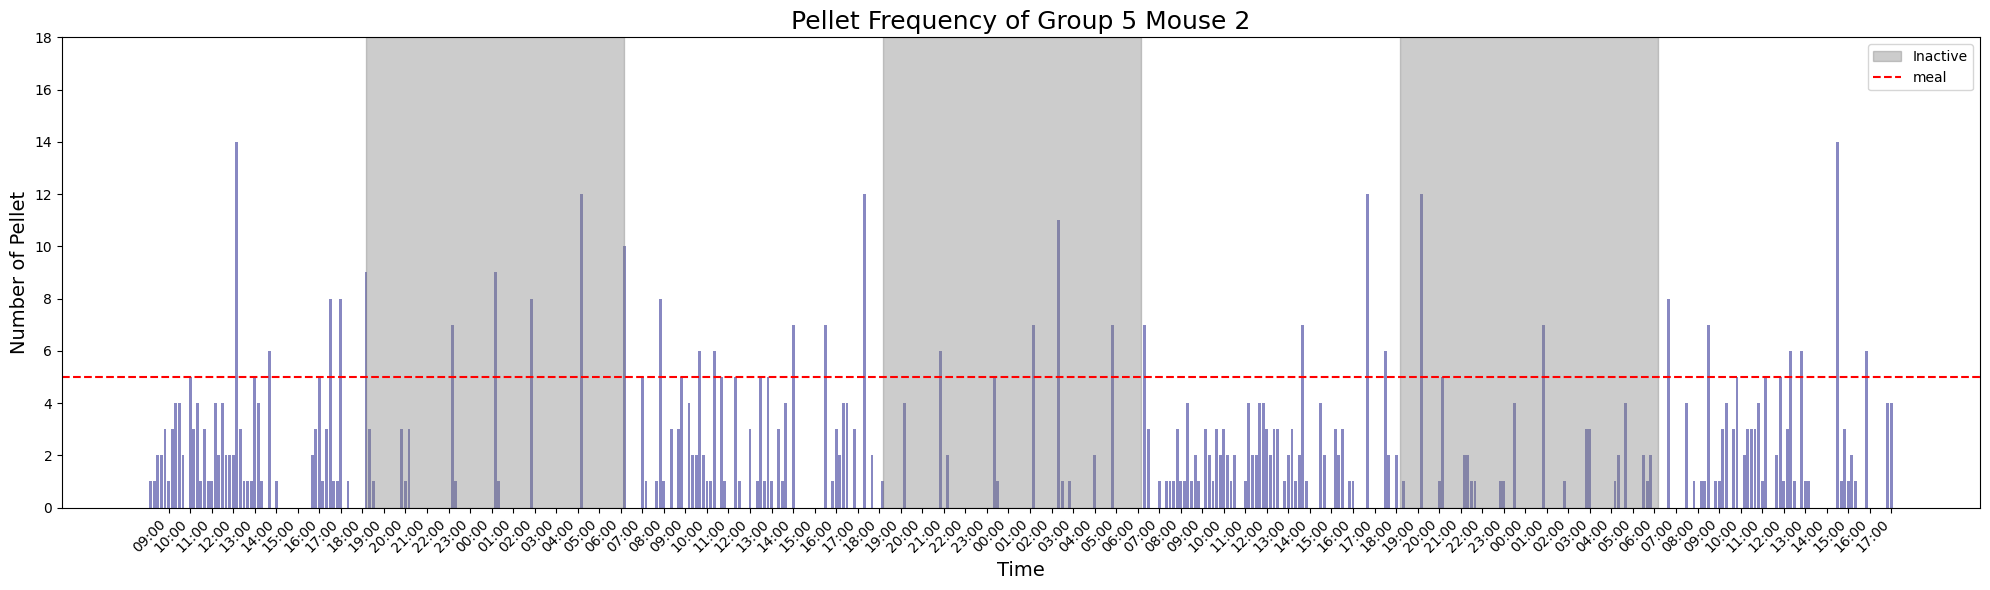

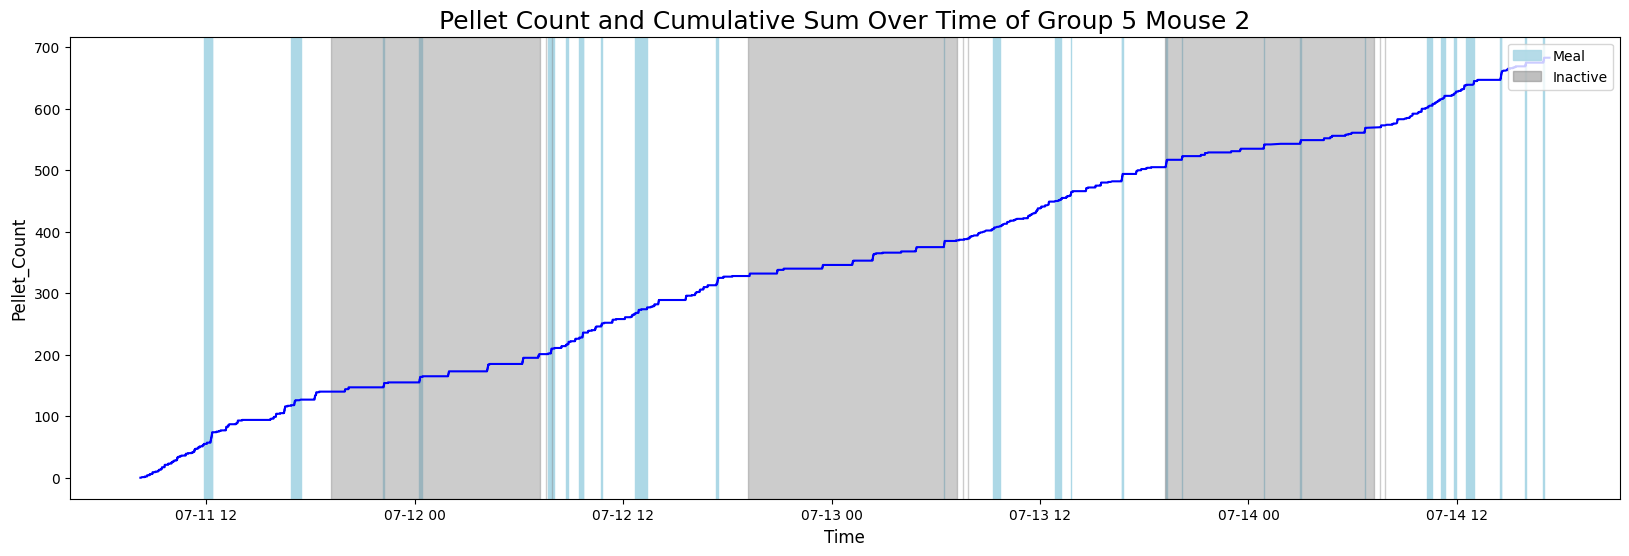

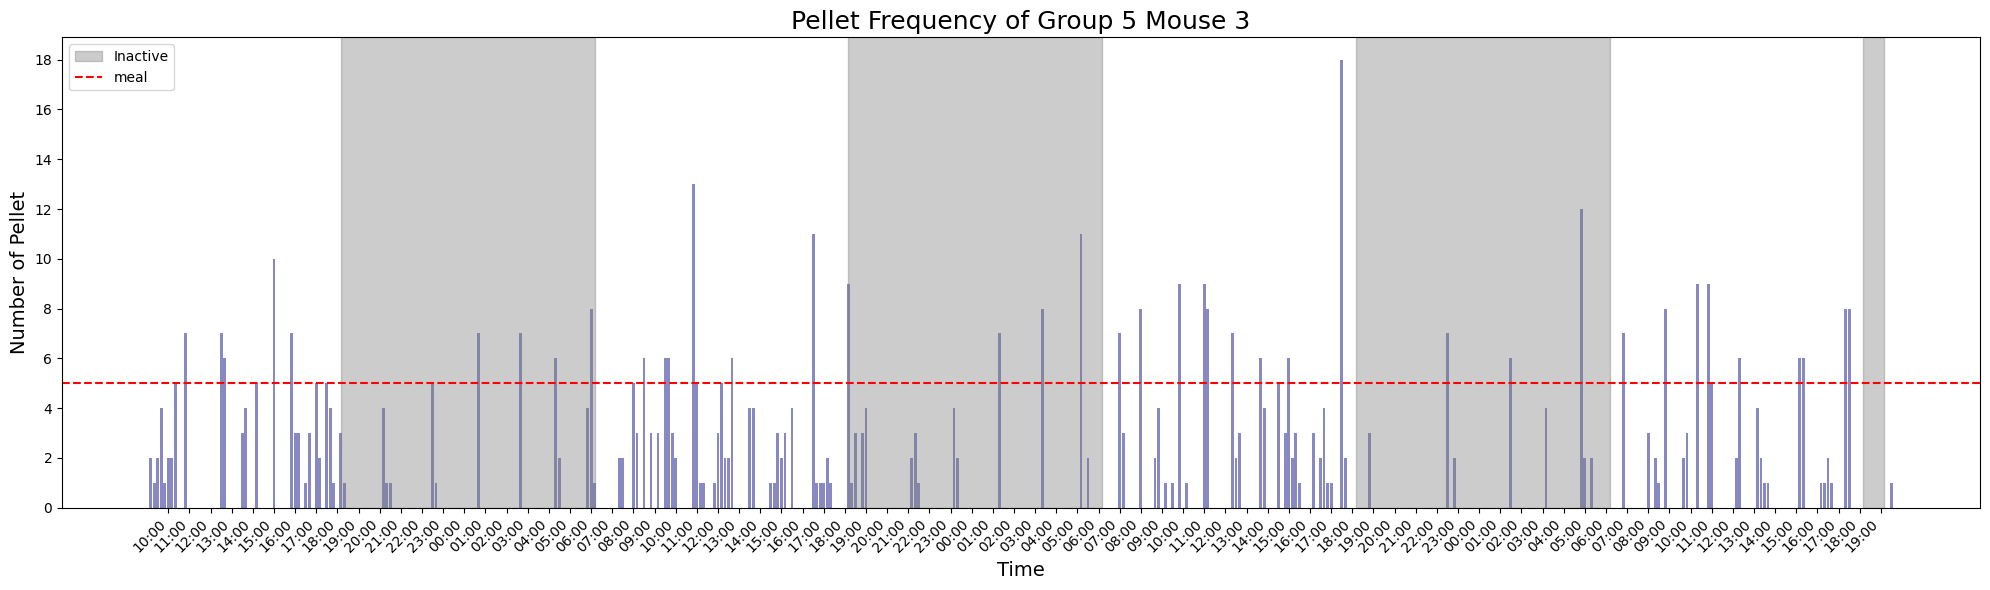

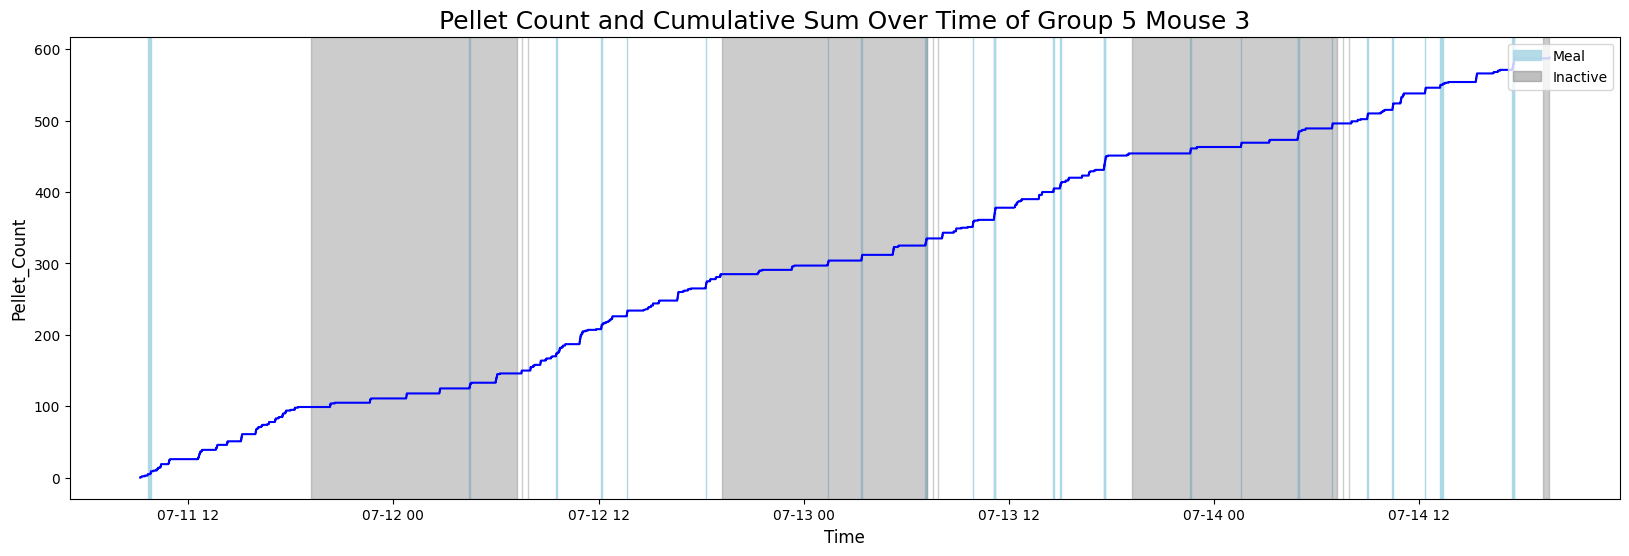

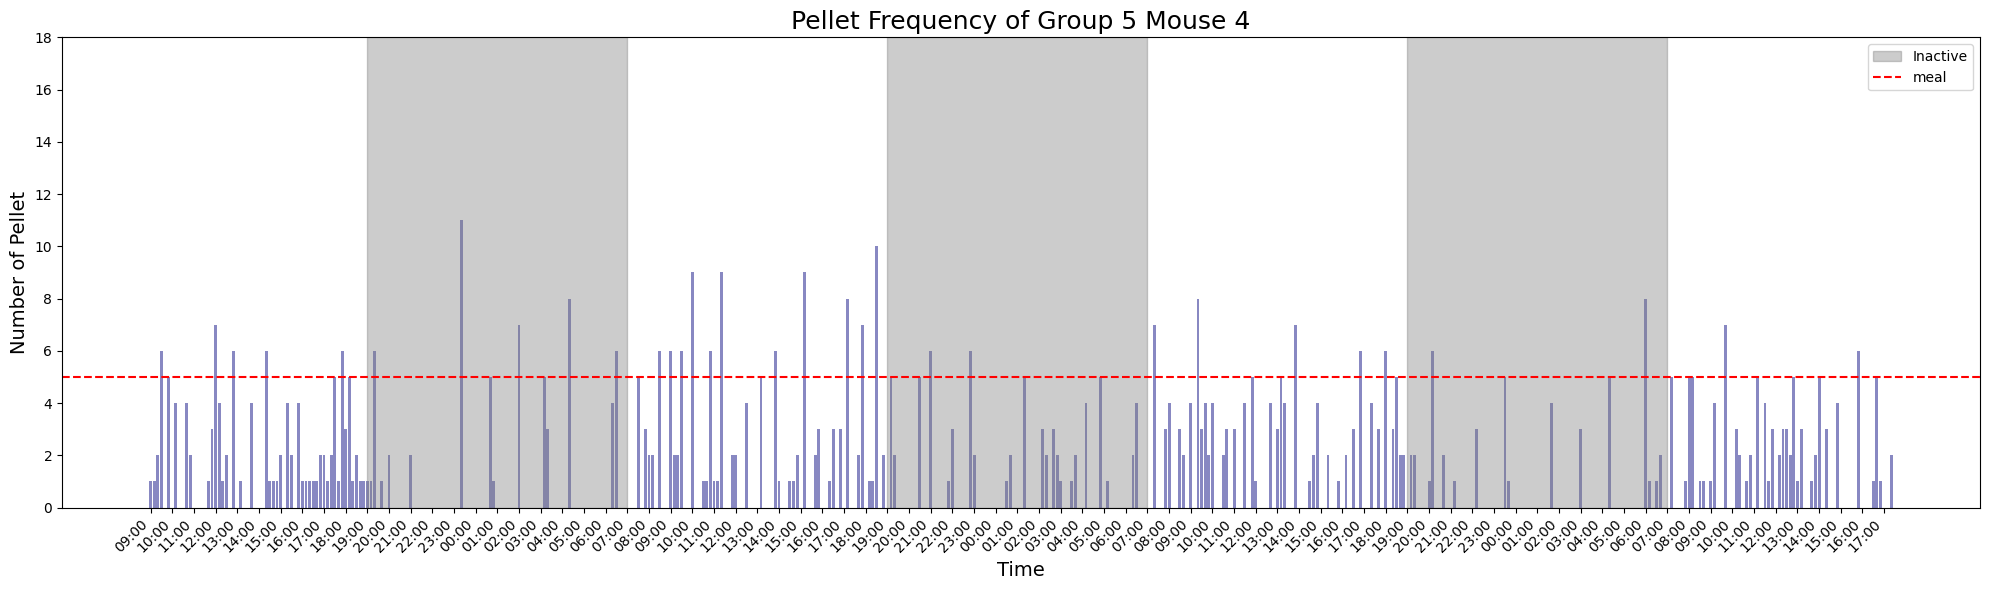

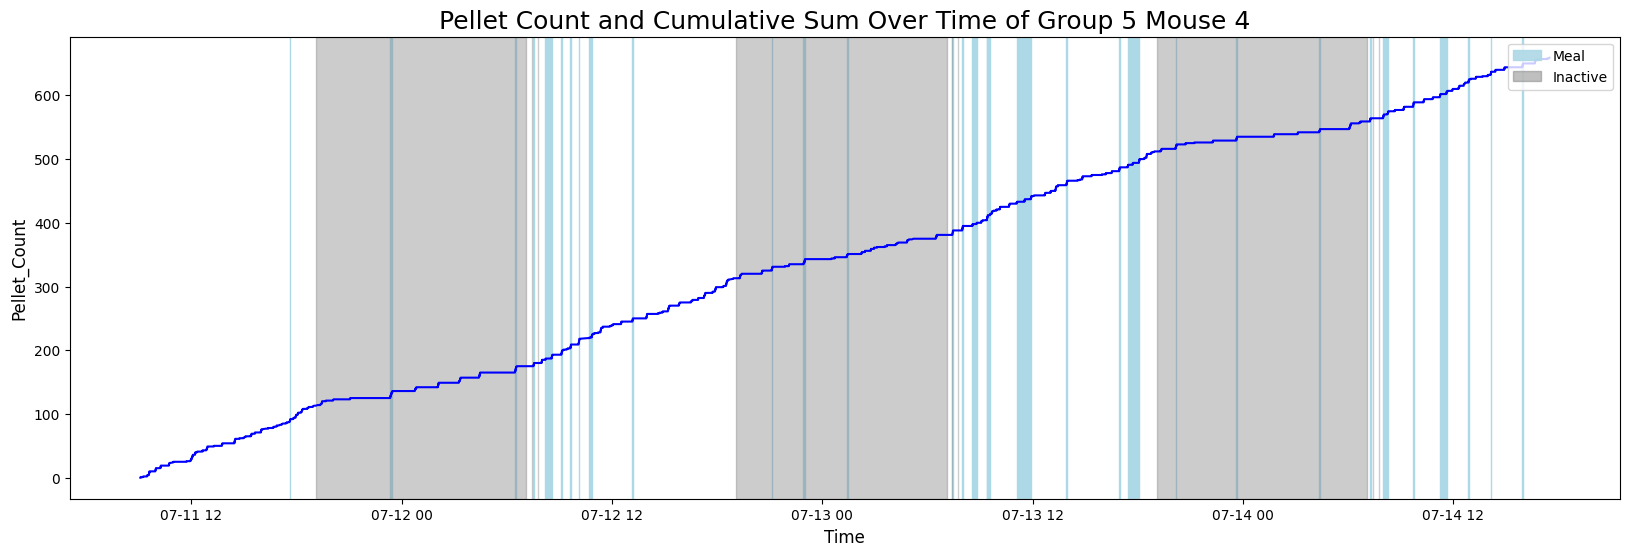

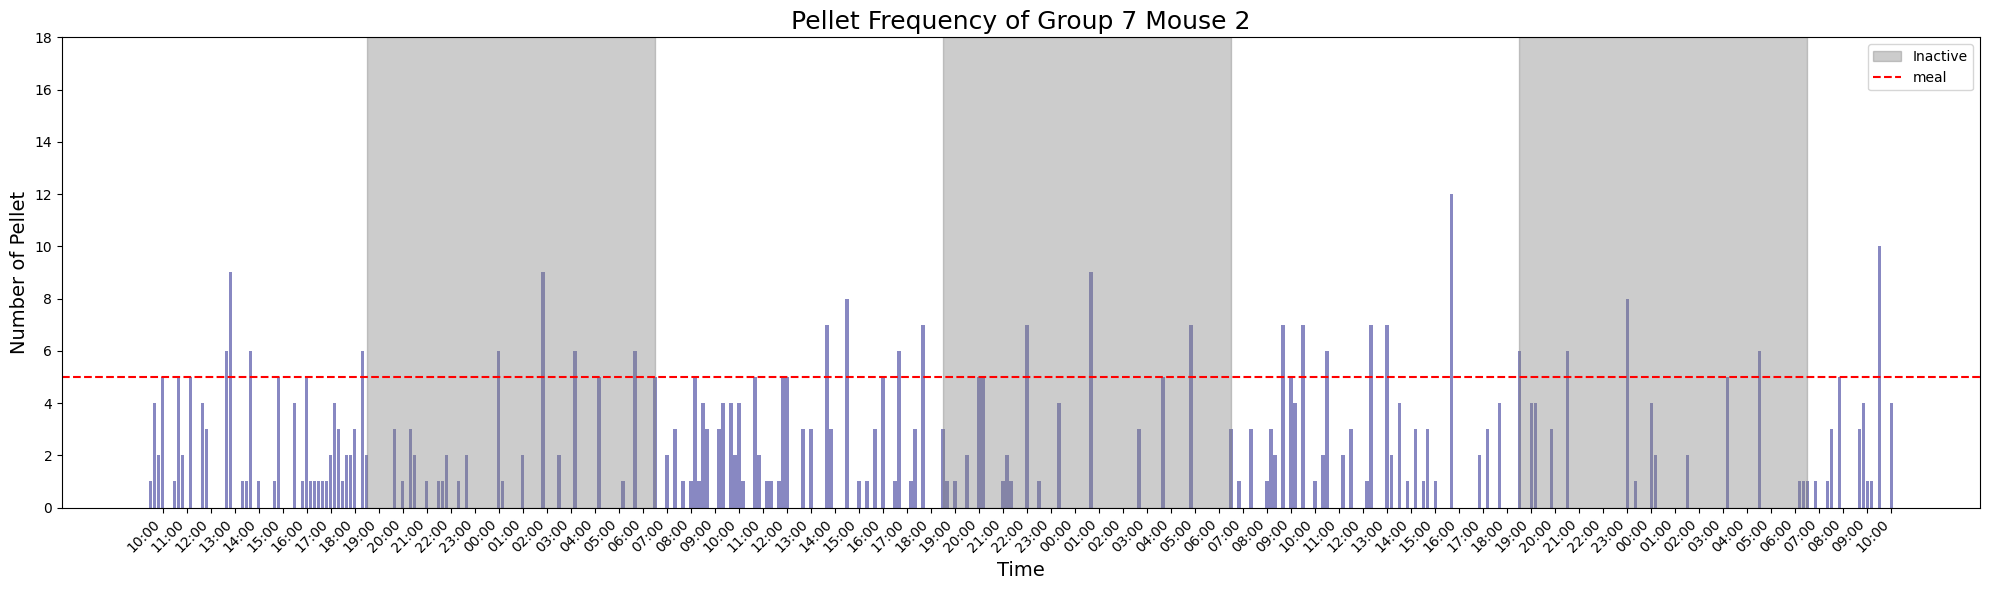

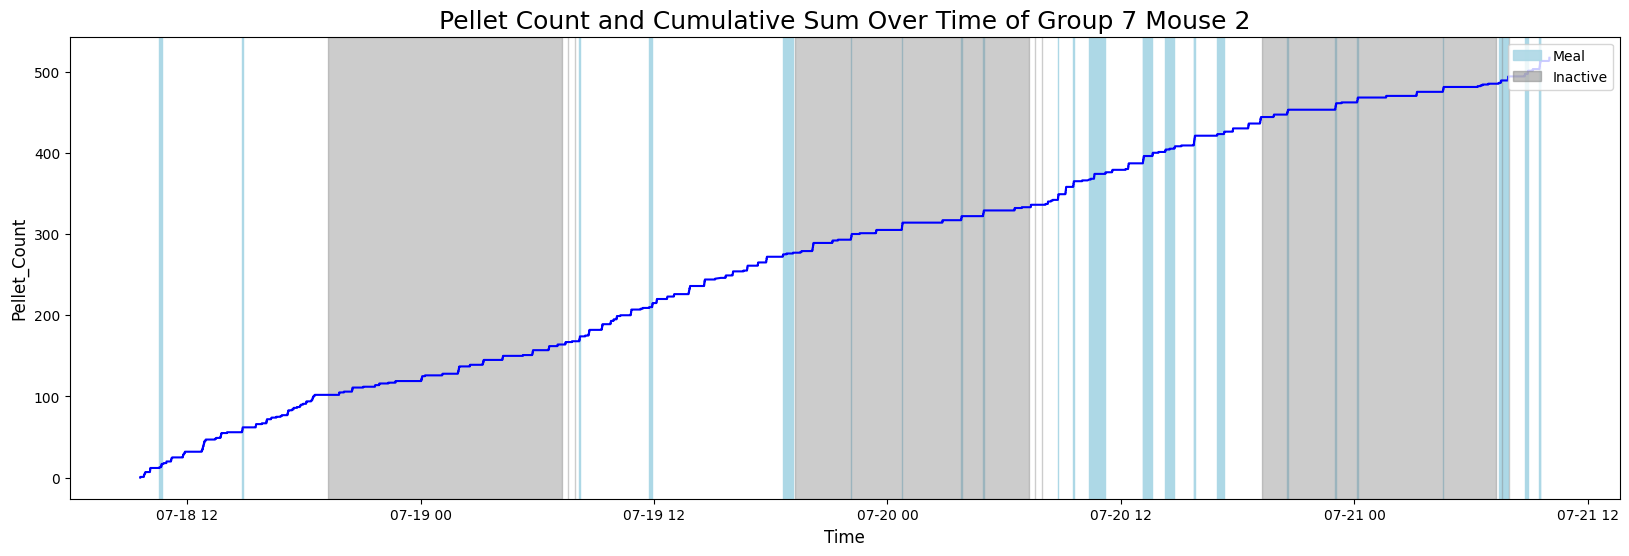

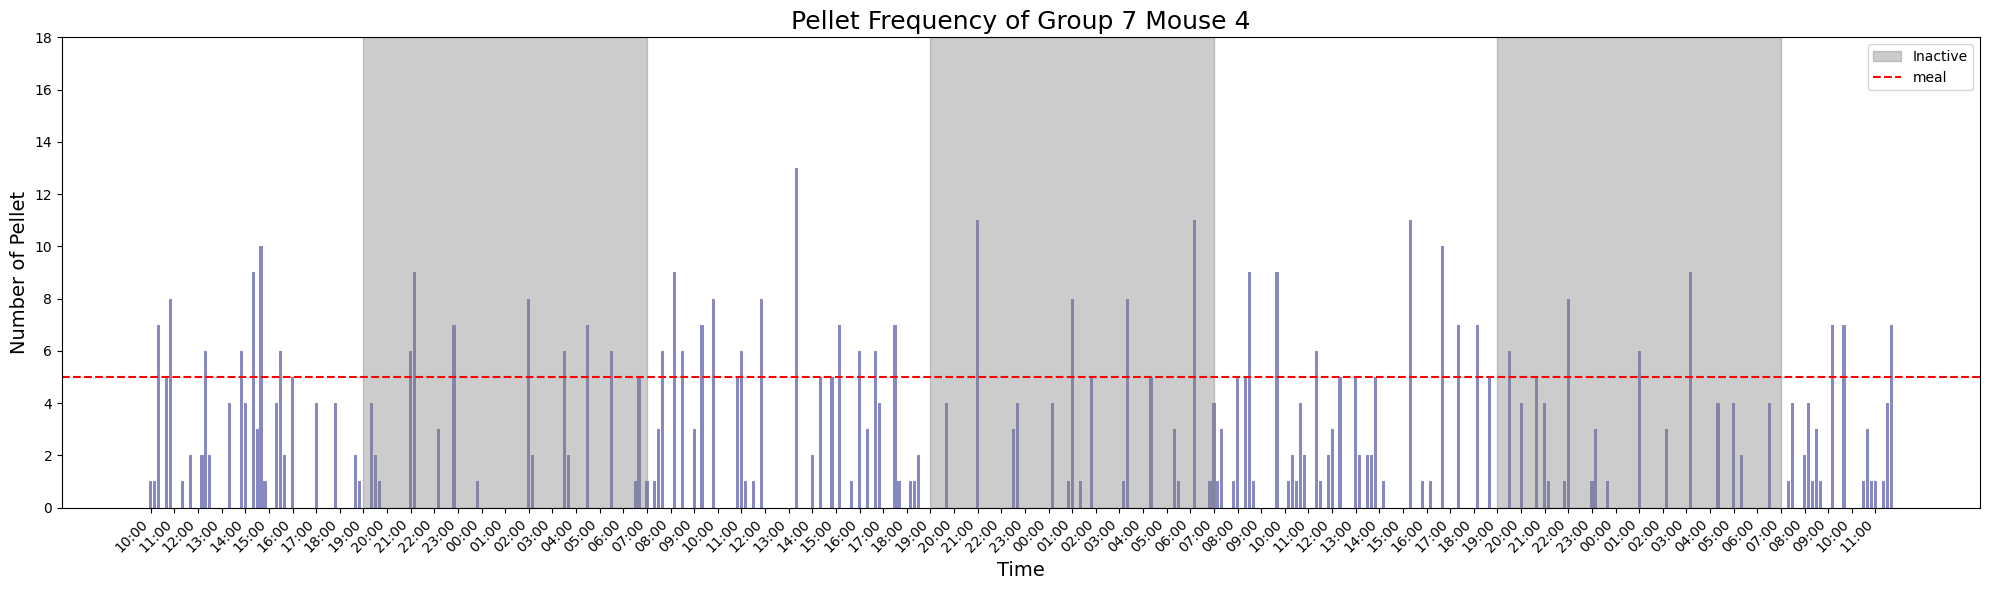

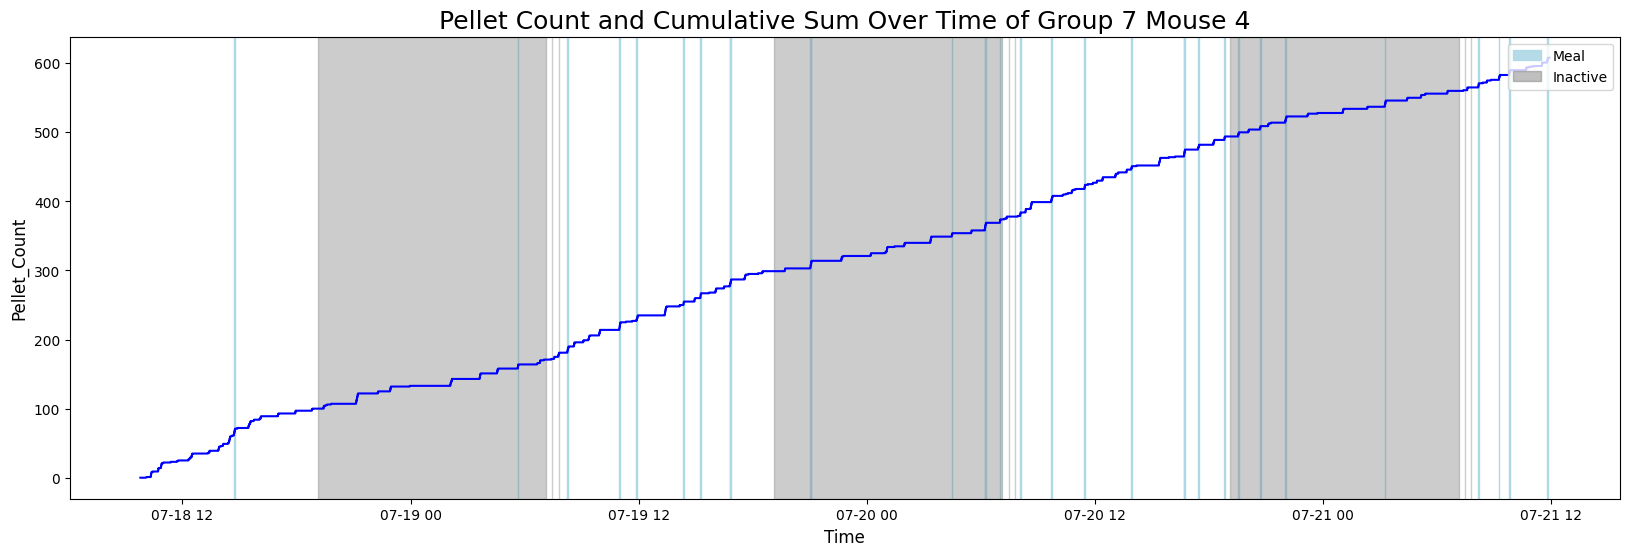

In [2]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
flip_ctrl_meal_count = []

for path in paths.contigency_flip_ctrl:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    meal = ml.find_meals(data)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    flip_ctrl_meal_count.append(avg)
    ctrl_avg_pellet.append(ml.average_pellet(group))
    ctrl_dark_meals.append(ml.active_meal(meal))
    ctrl_fir_meal.append(meal_1)
    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

### Cask Group

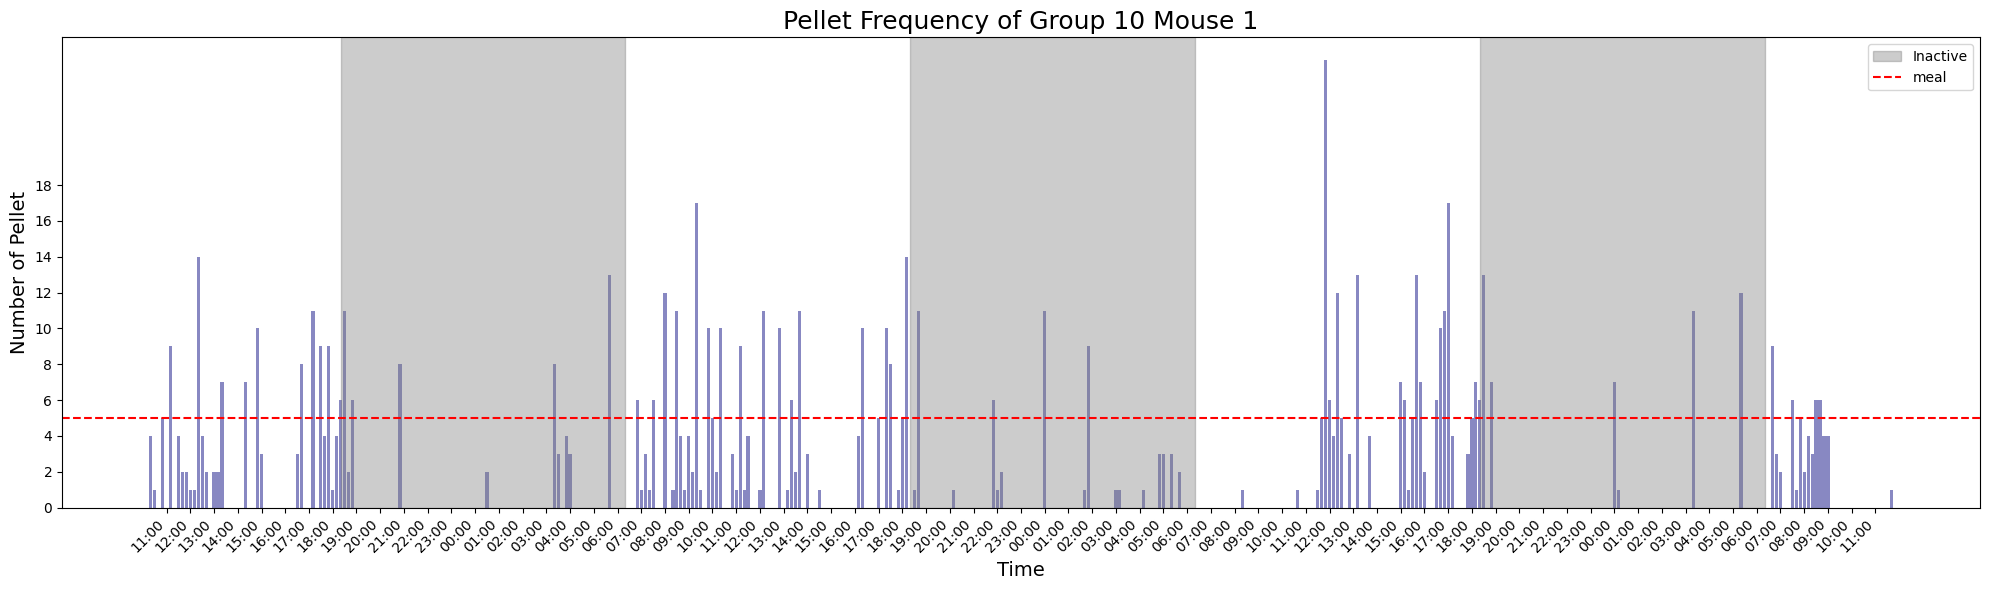

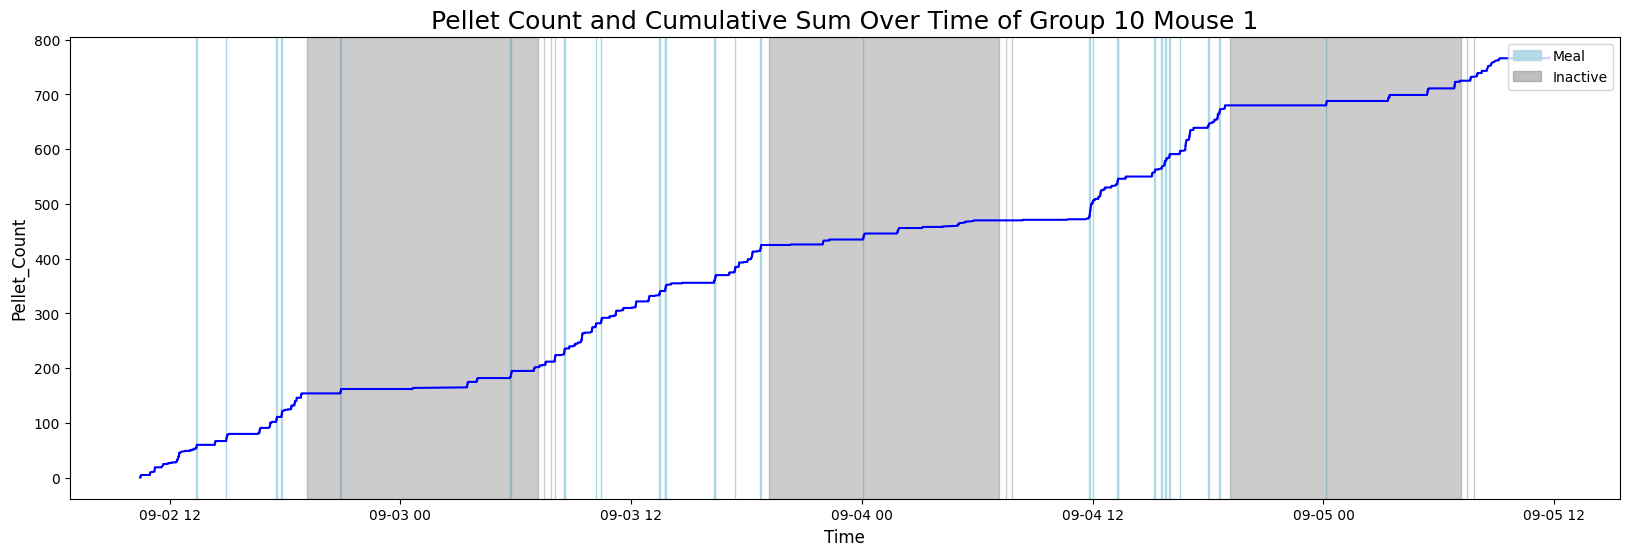

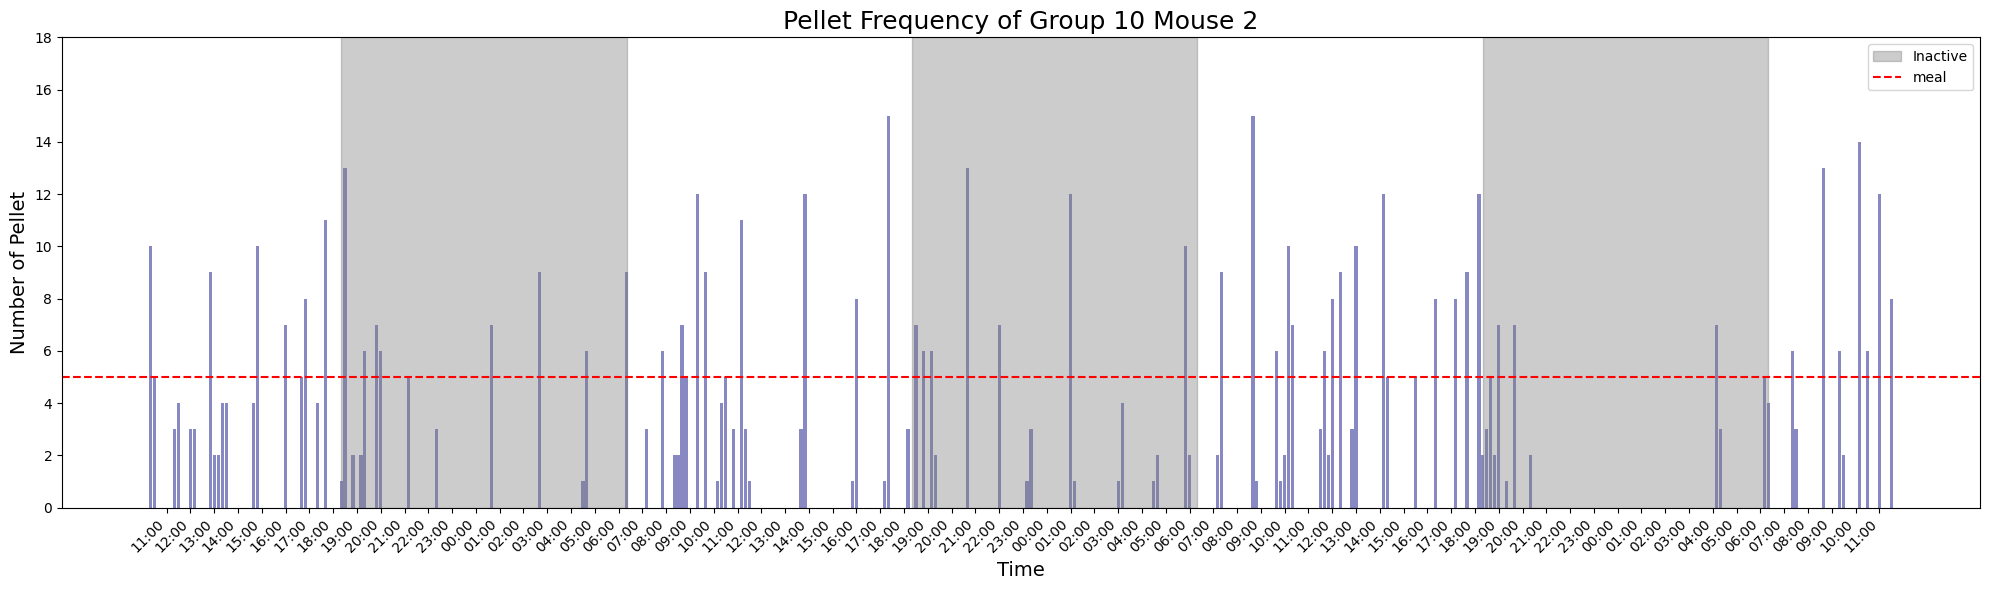

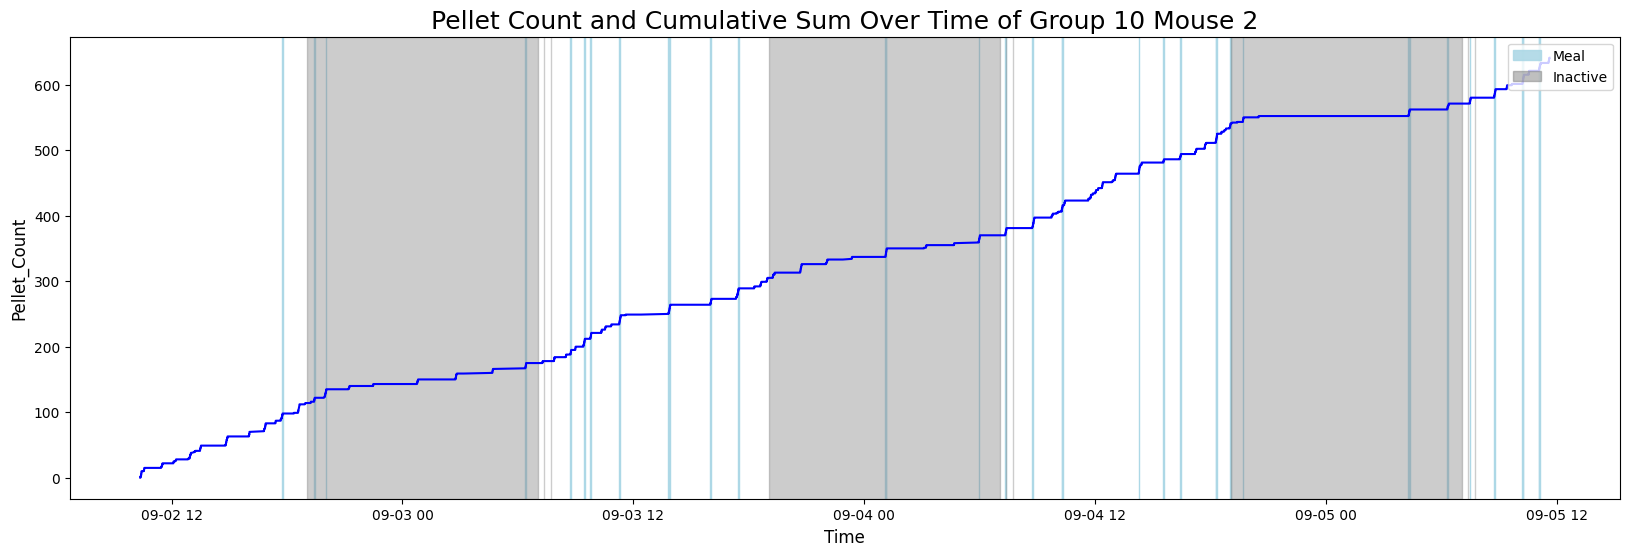

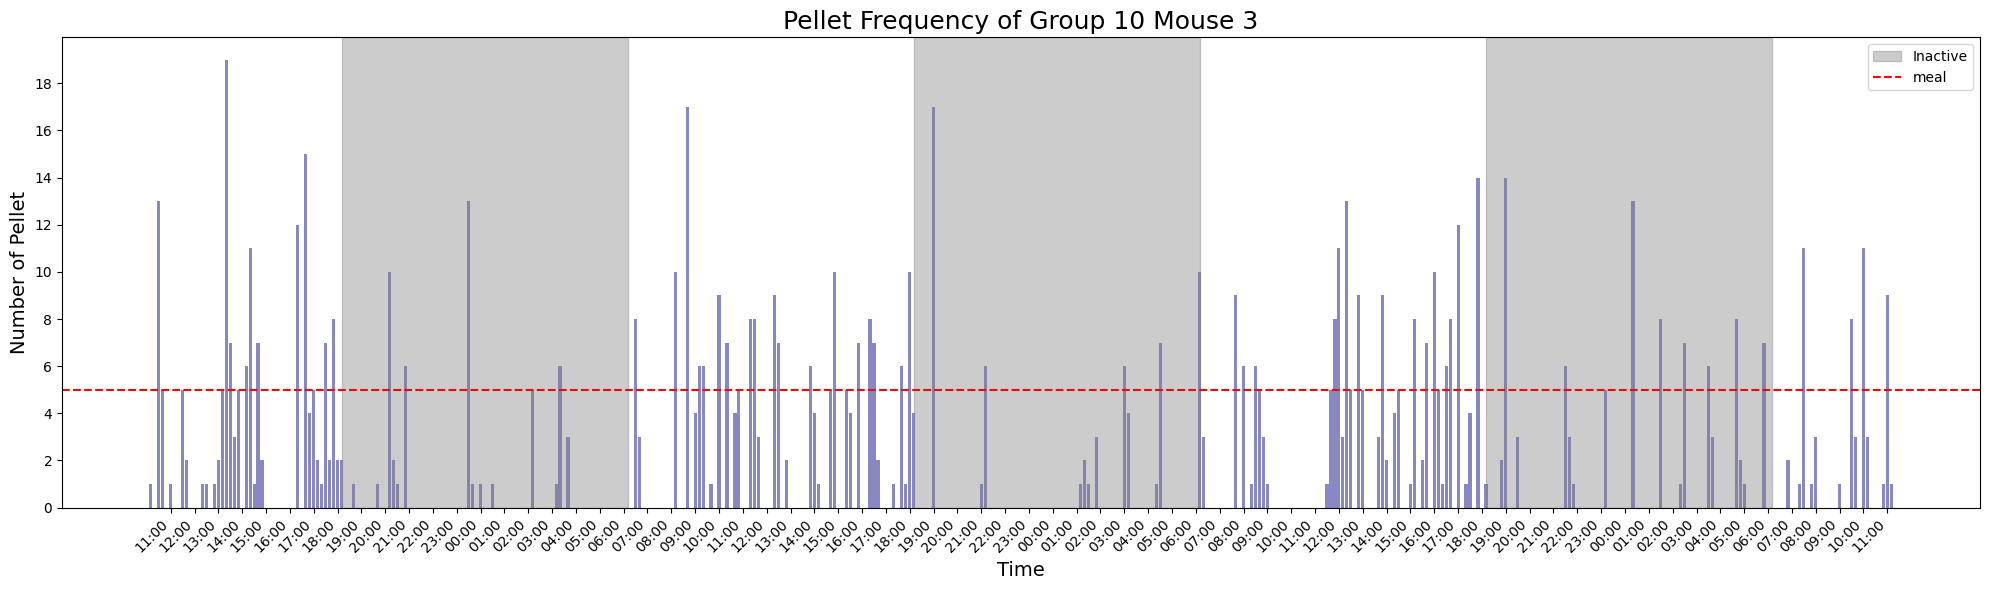

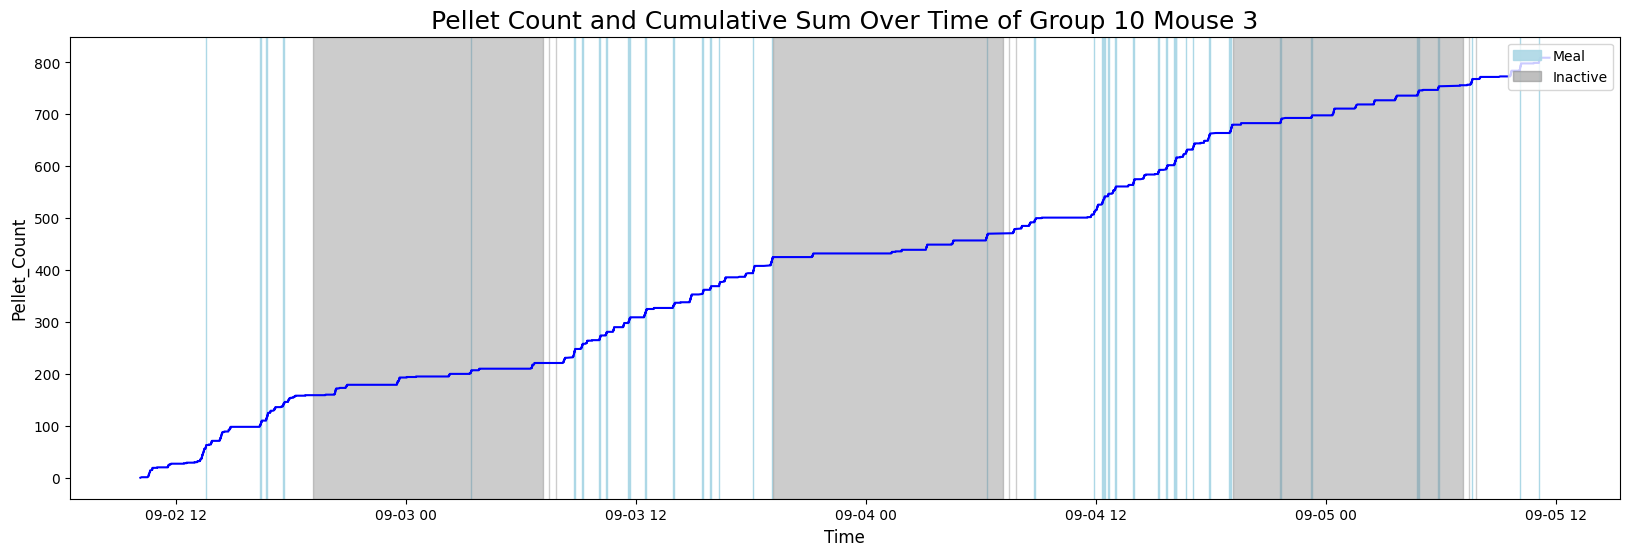

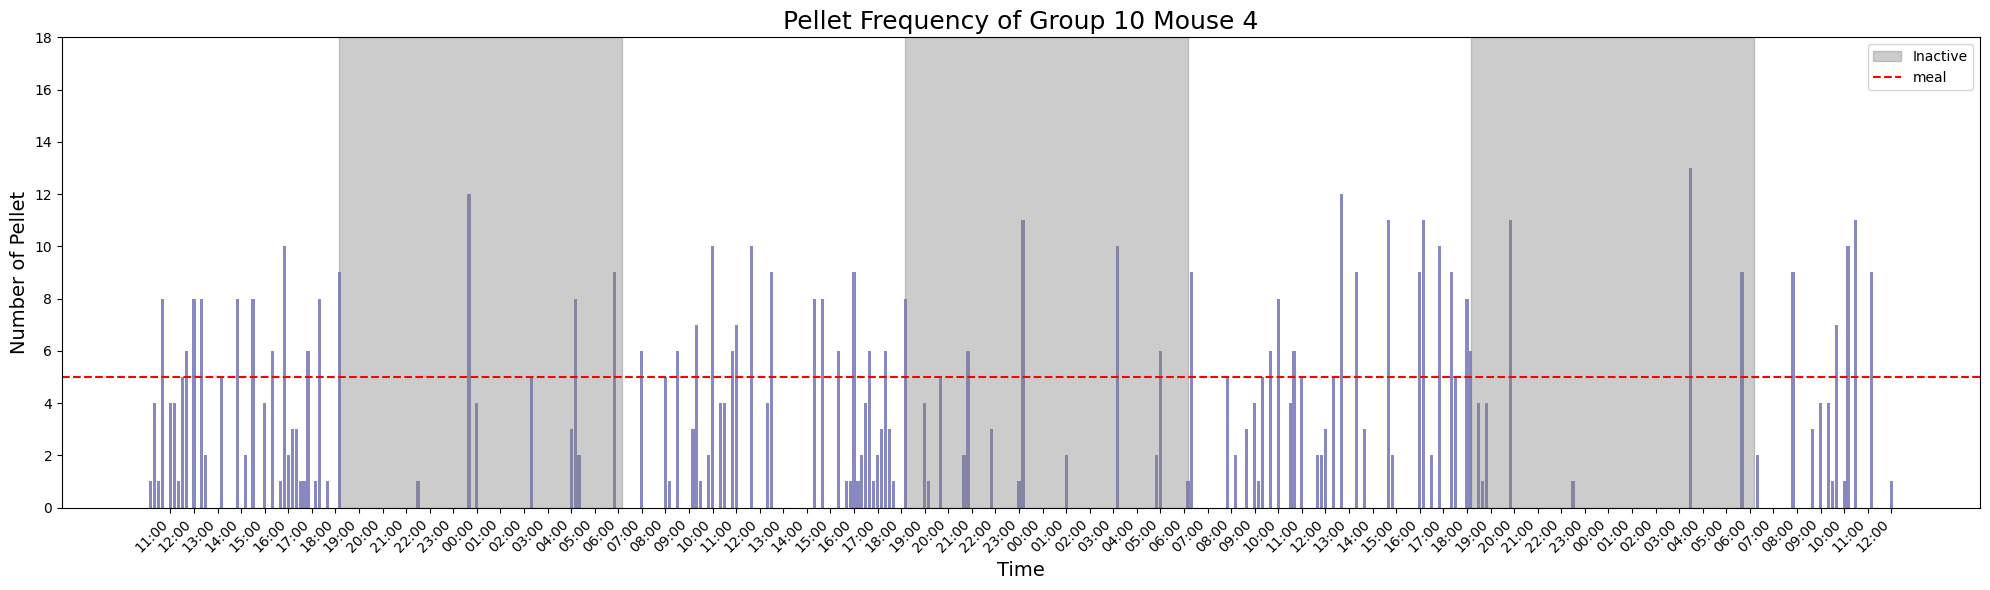

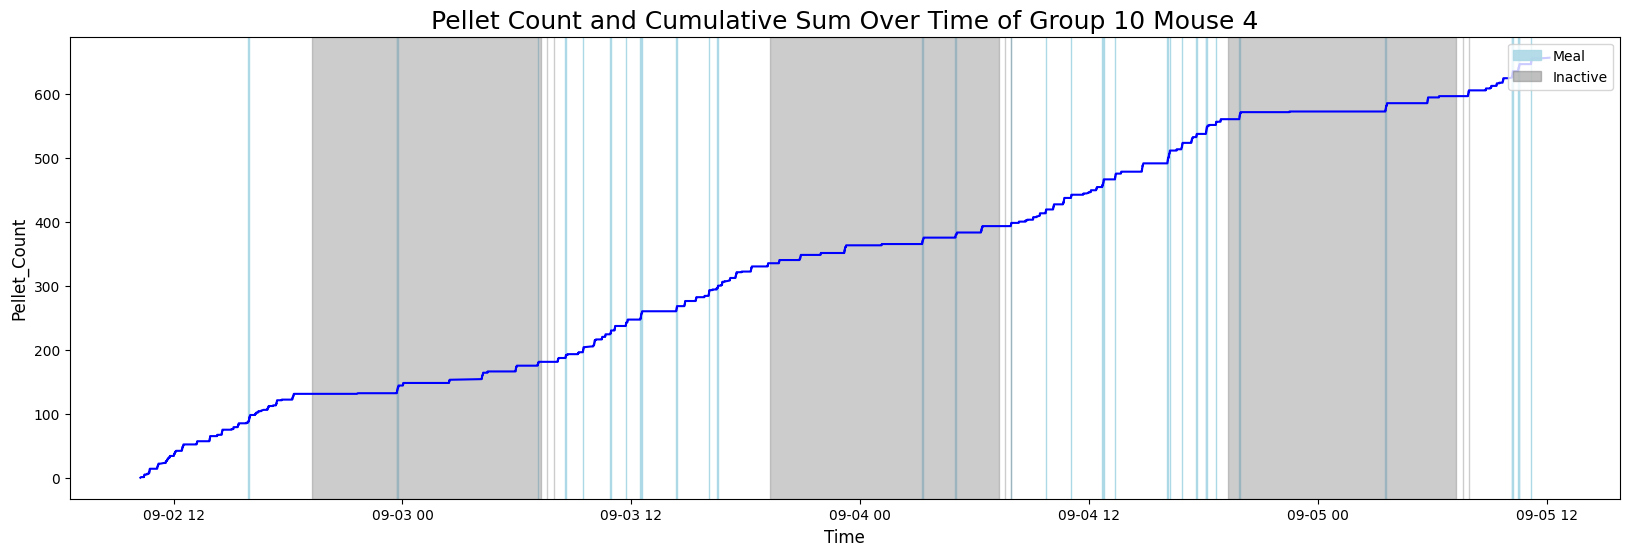

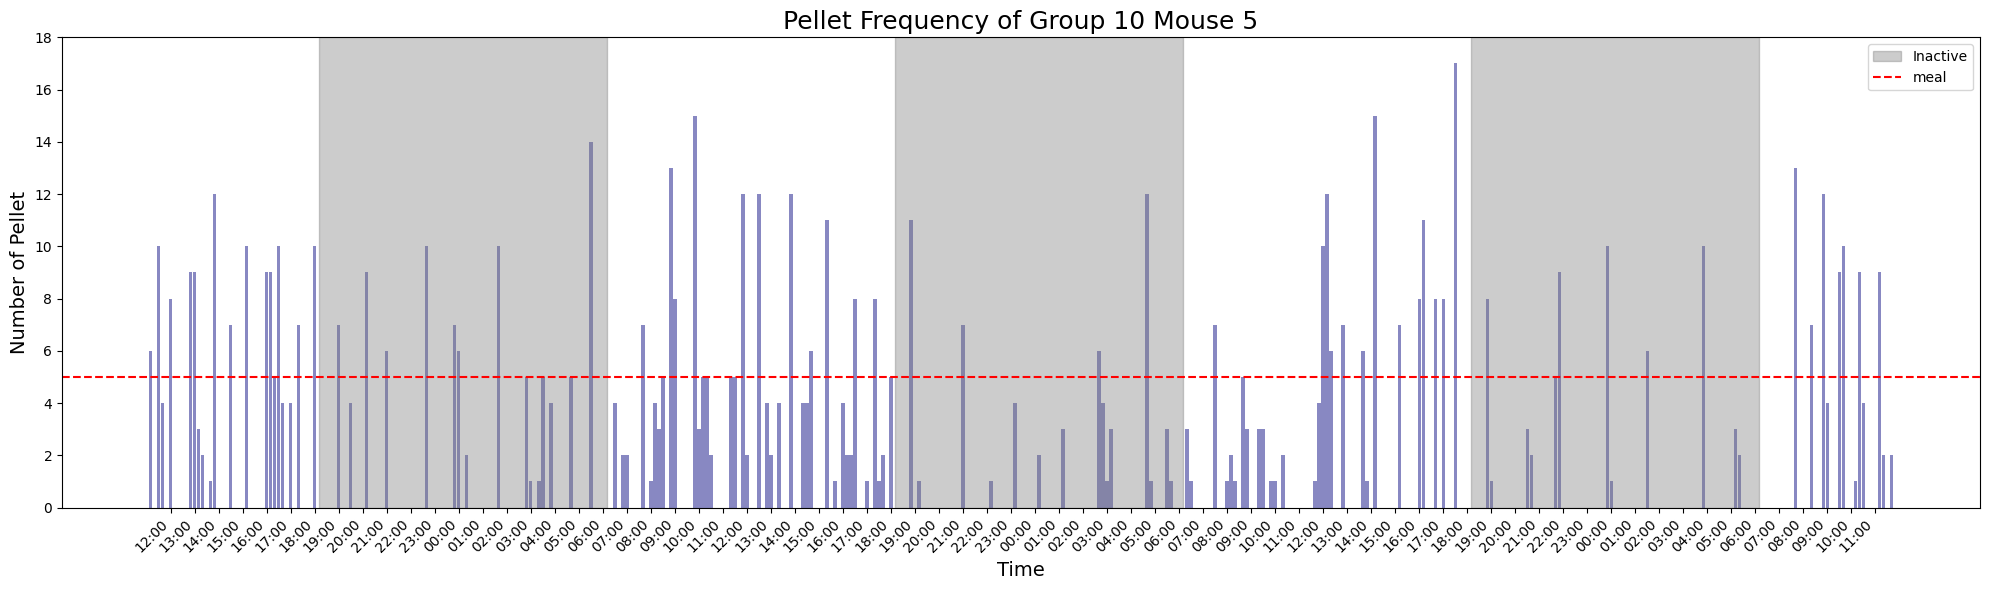

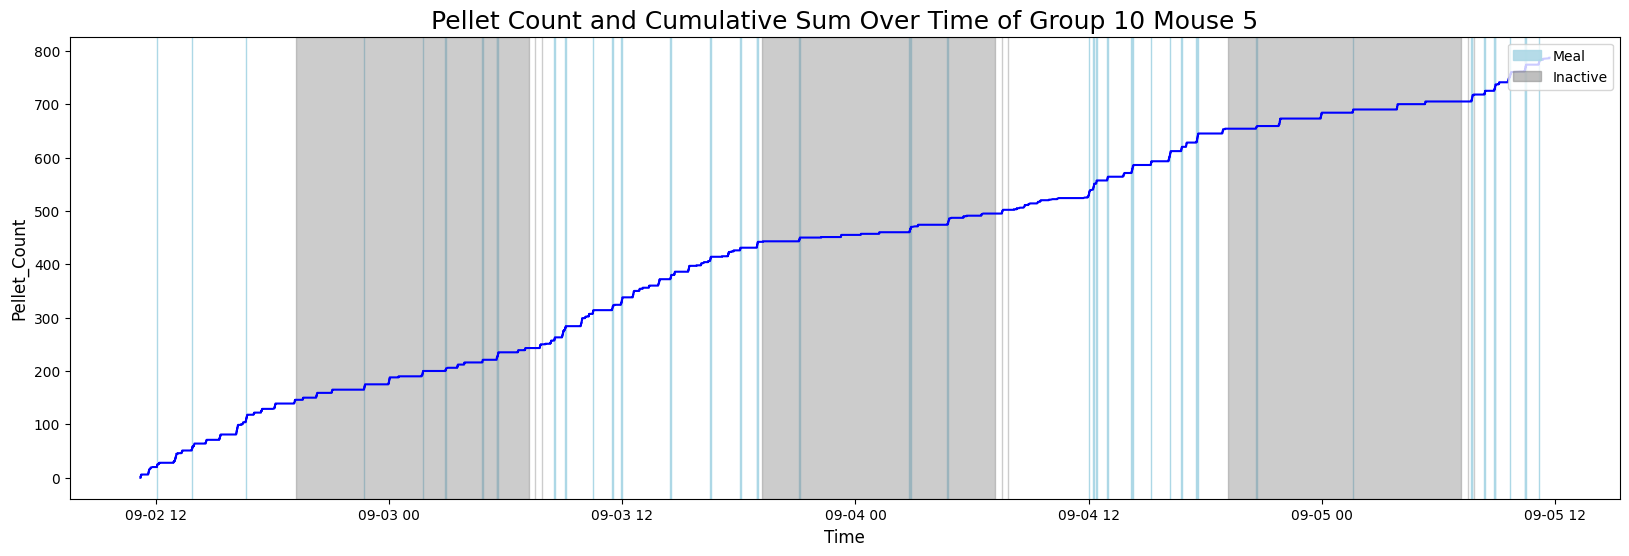

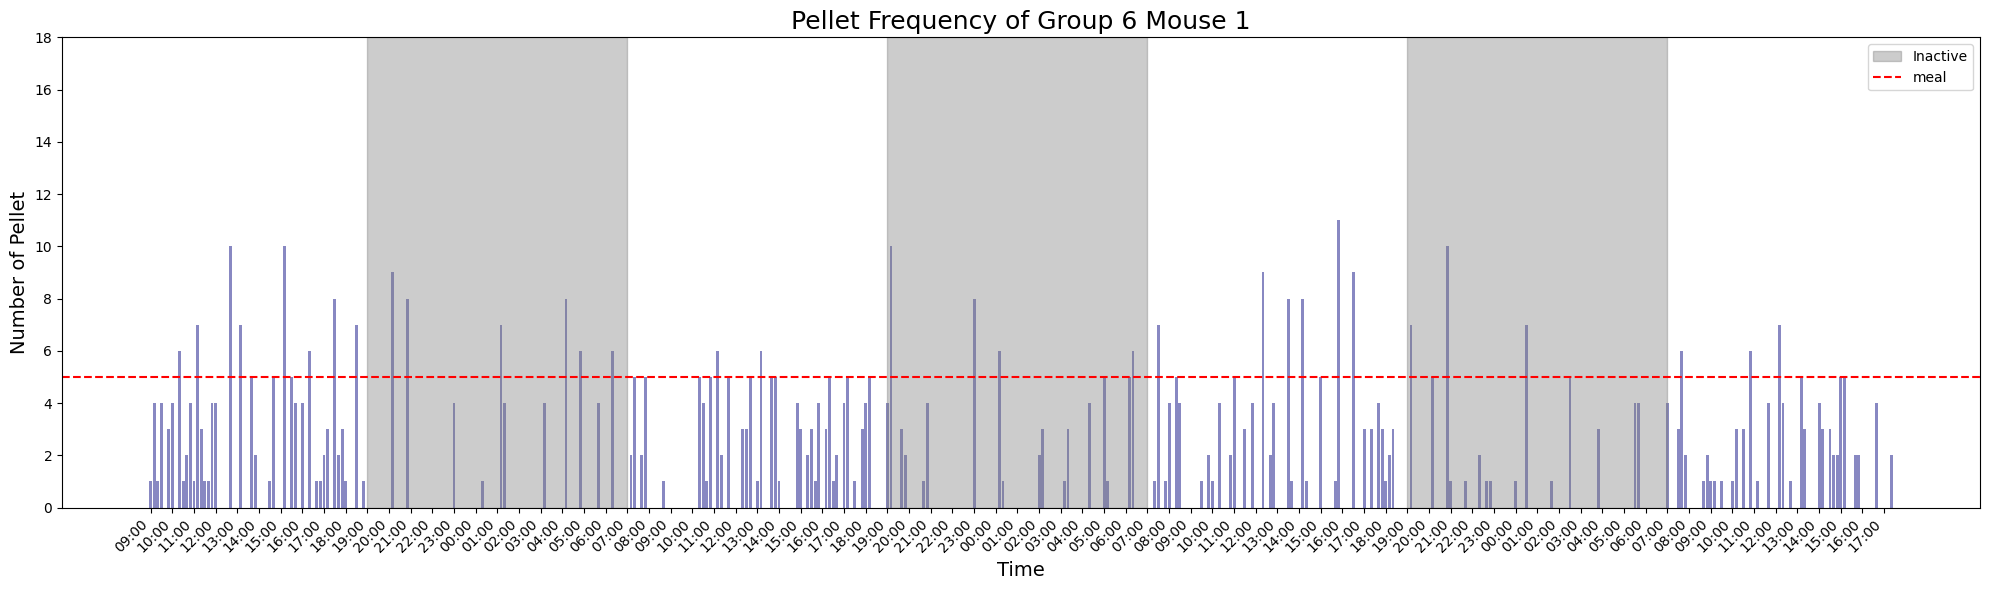

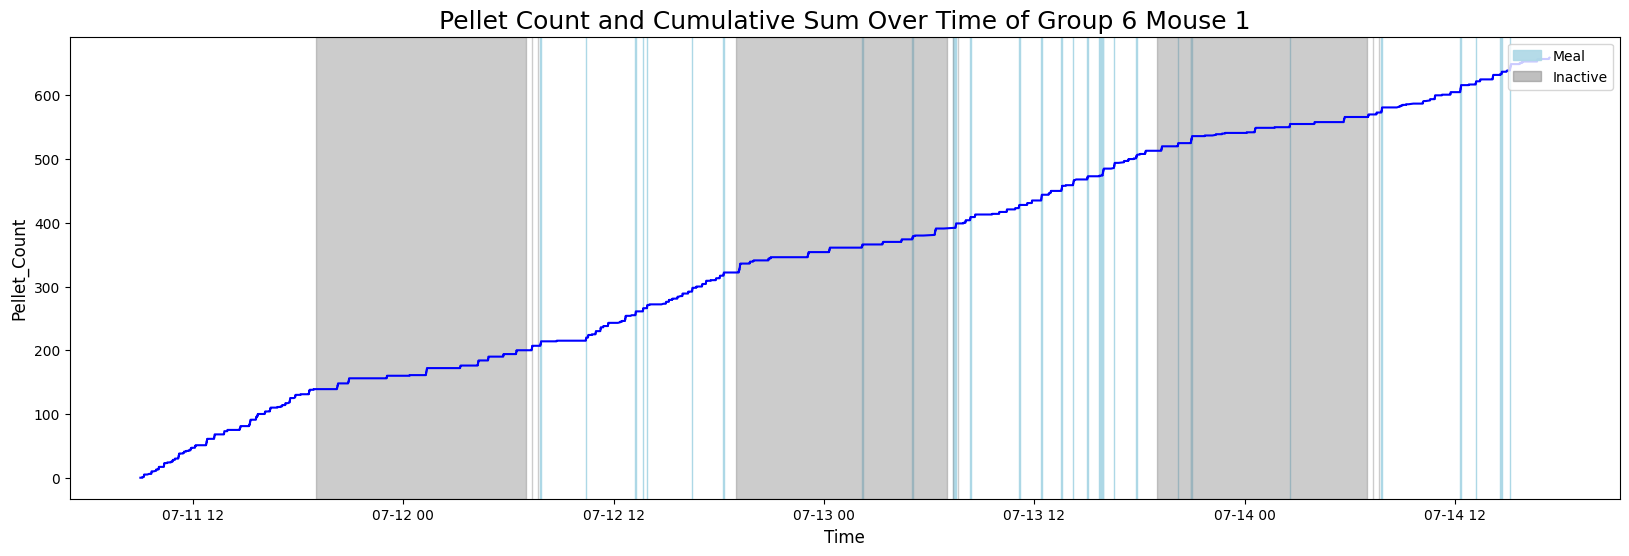

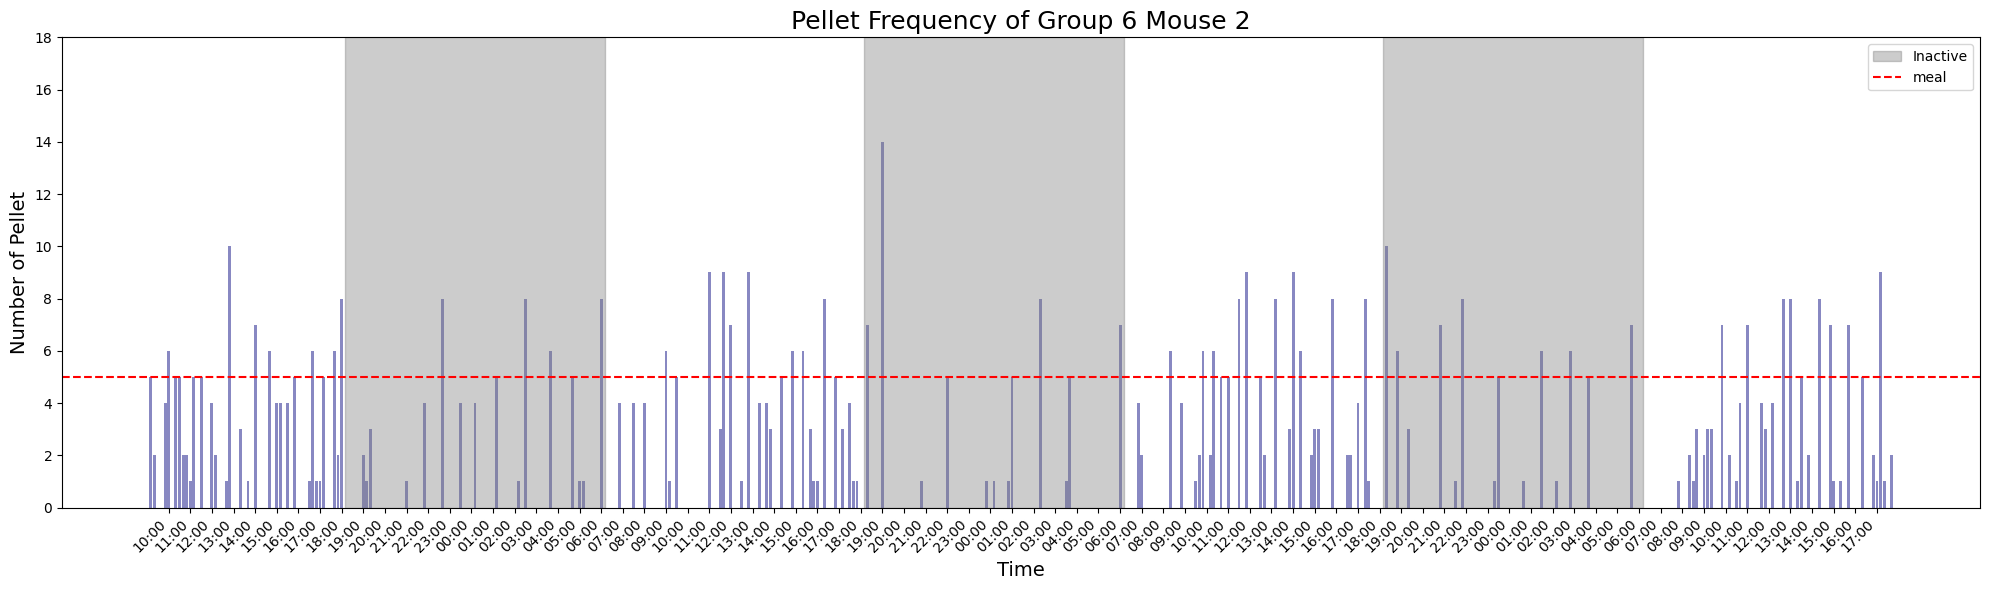

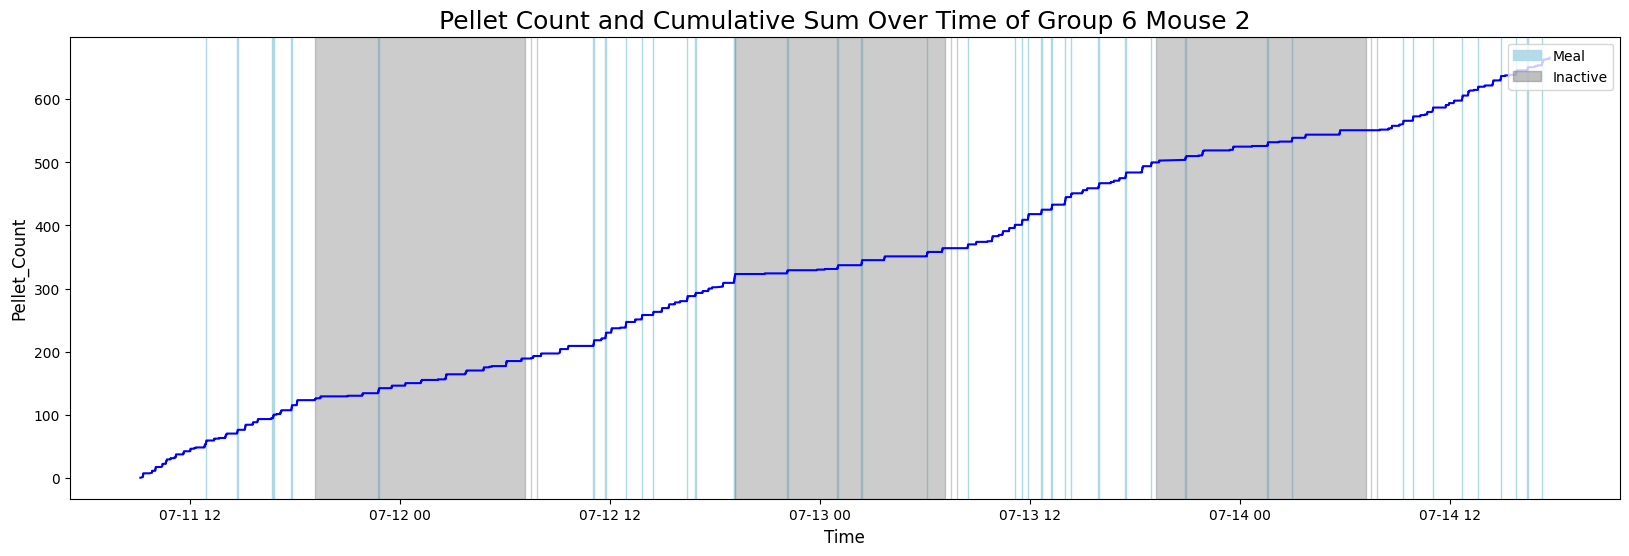

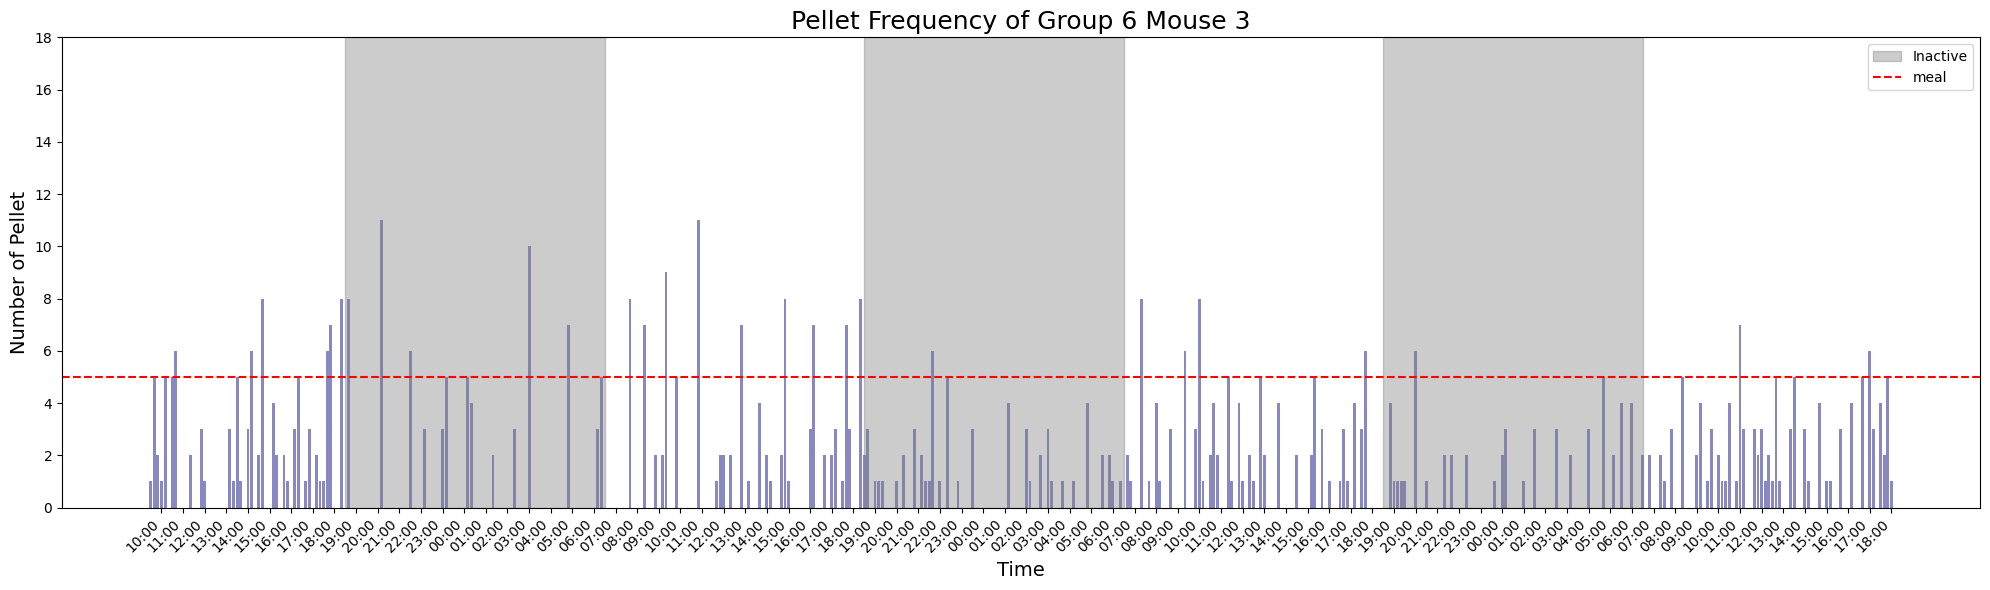

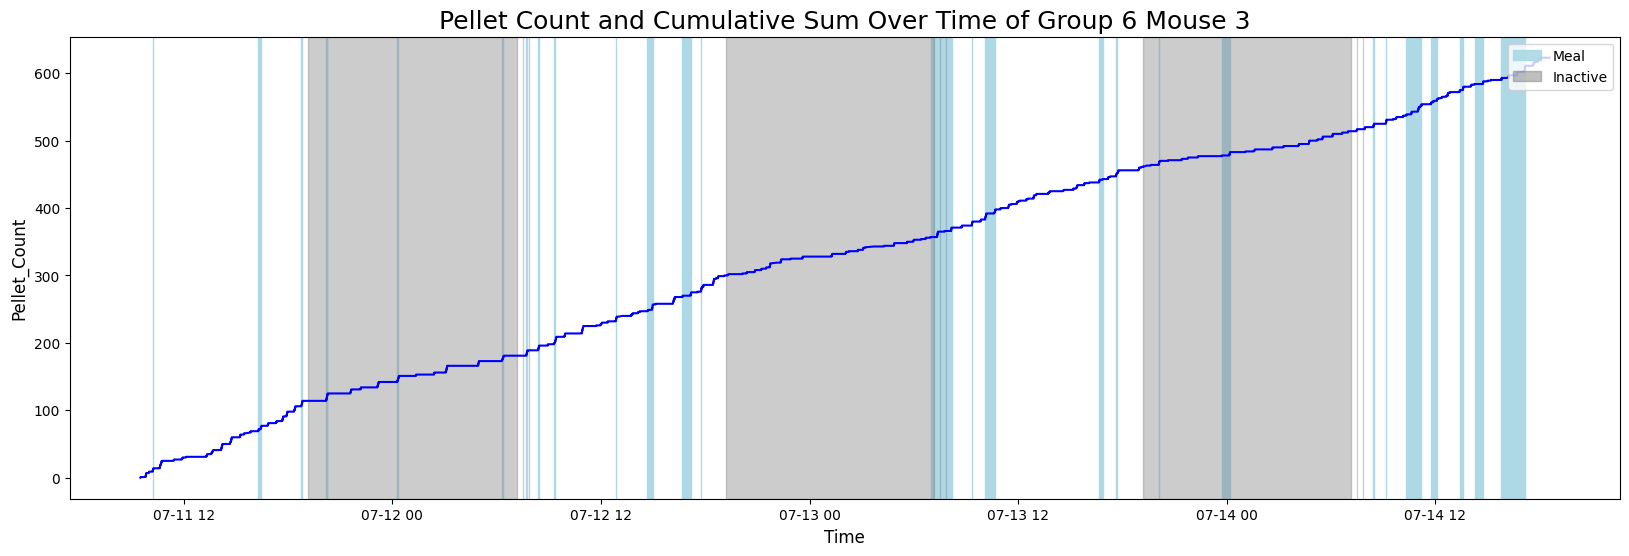

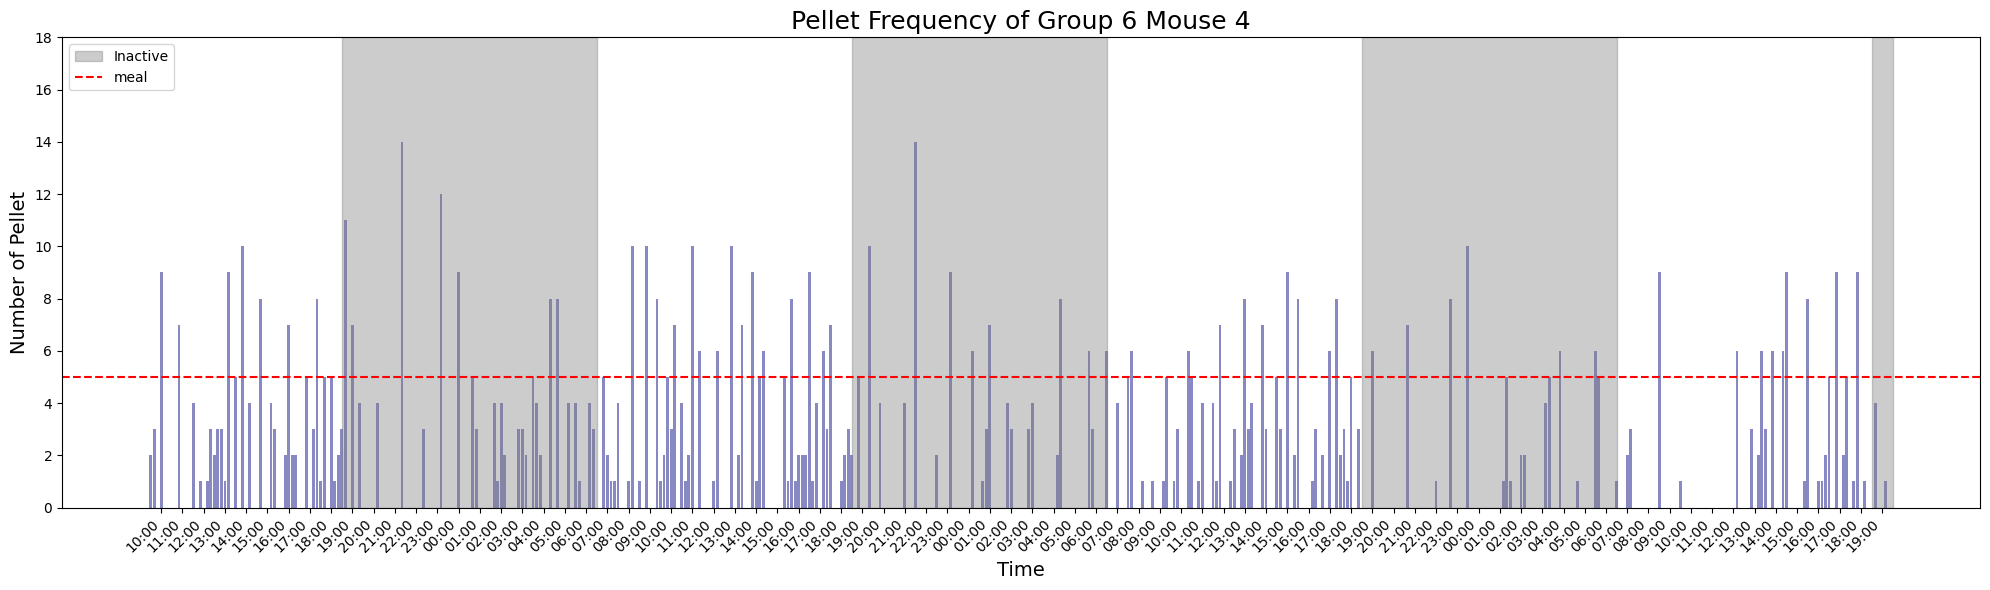

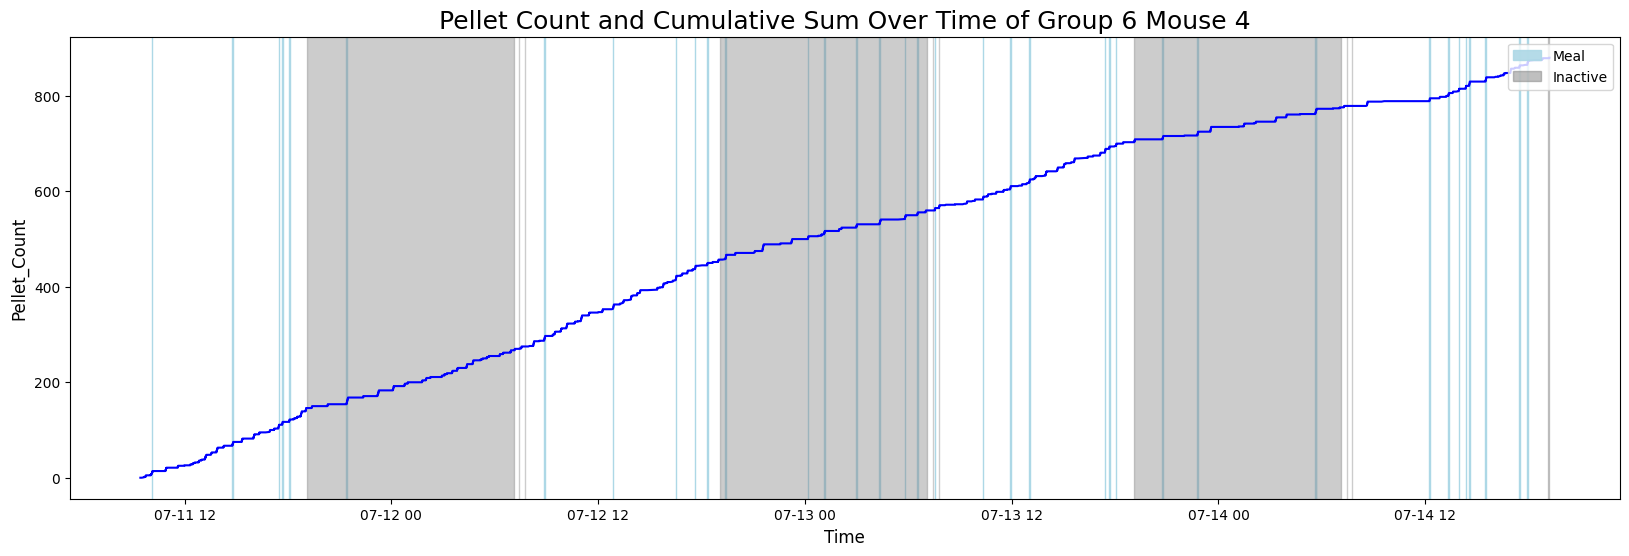

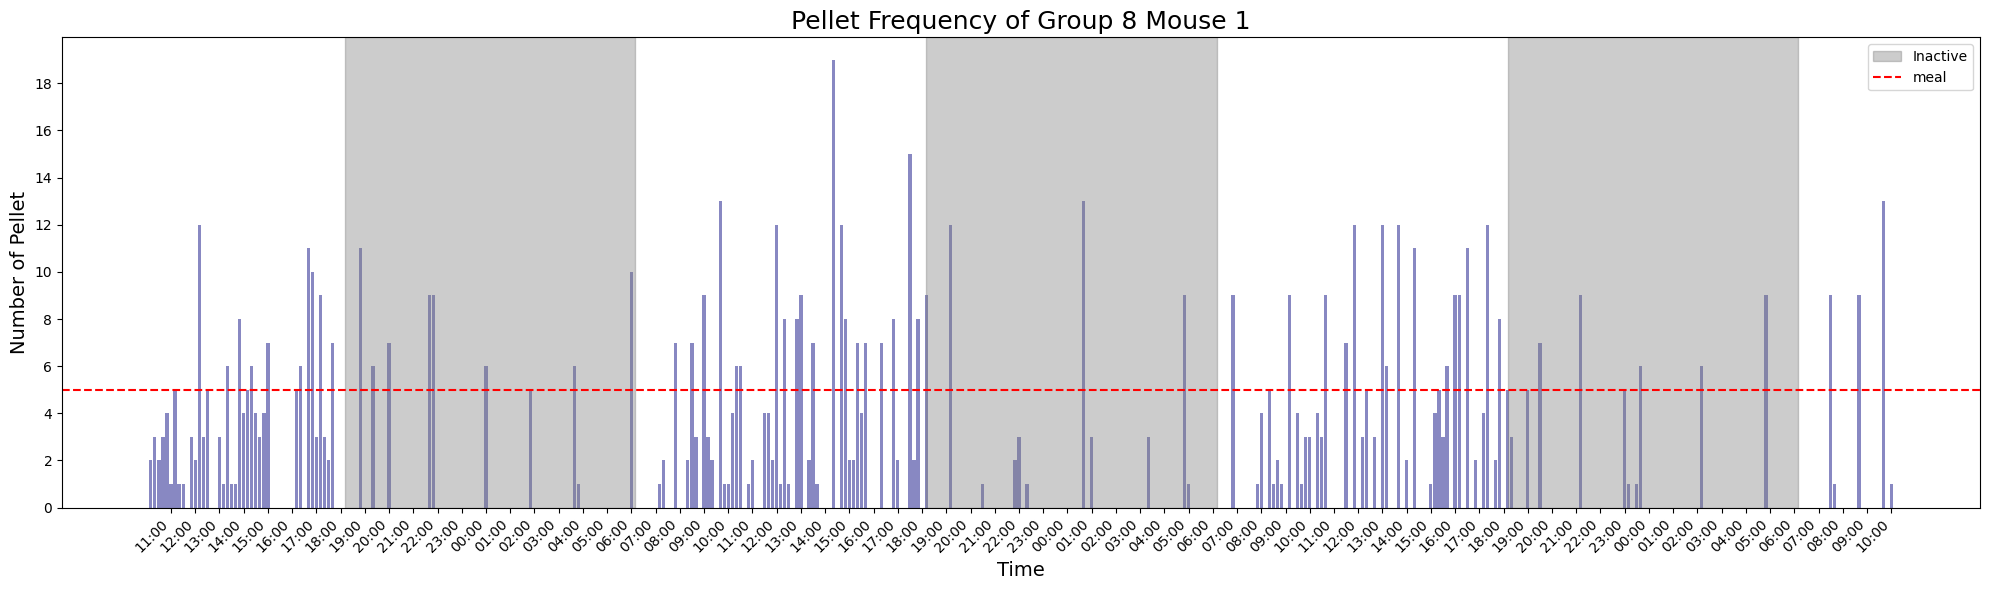

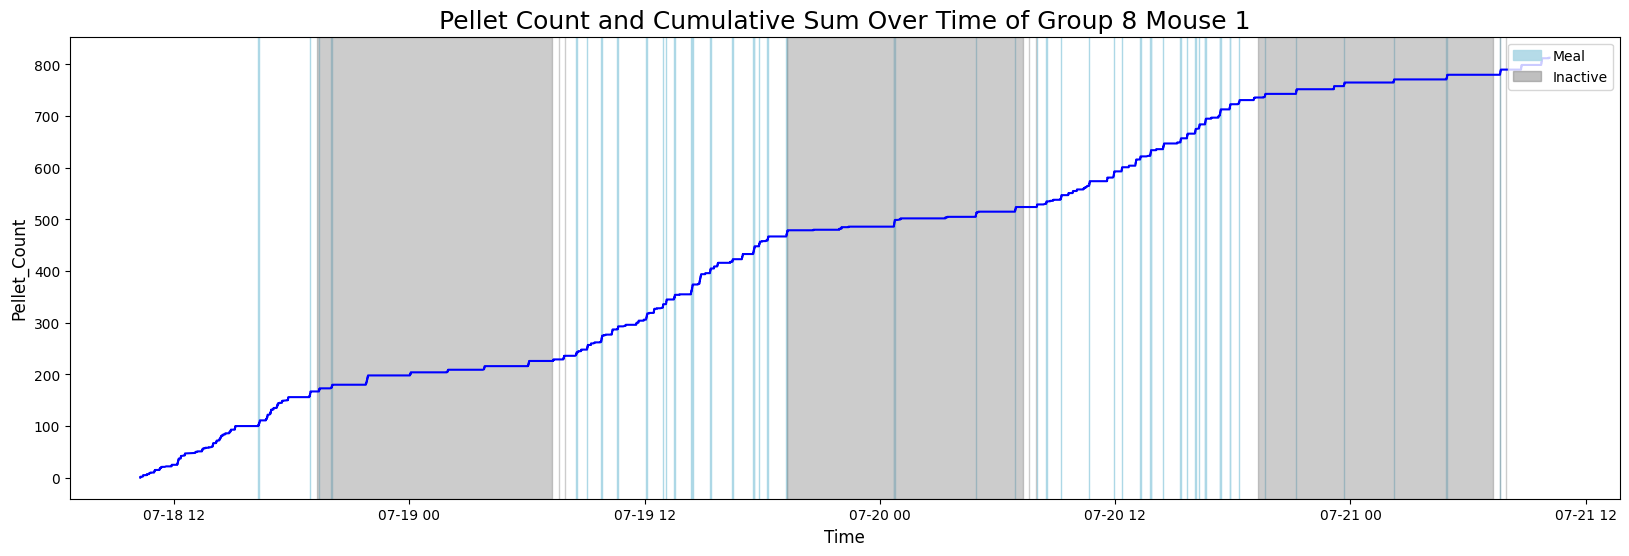

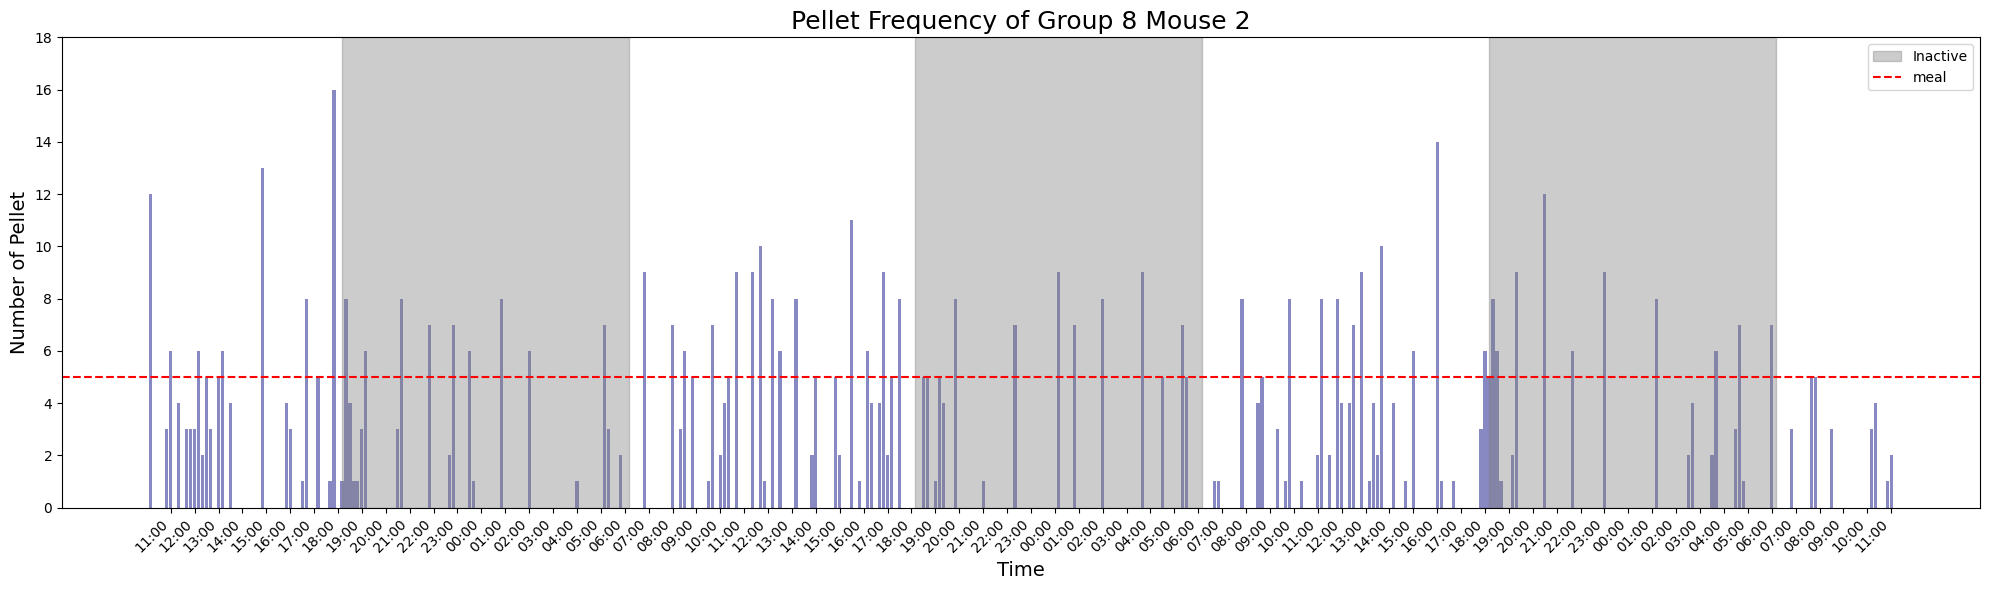

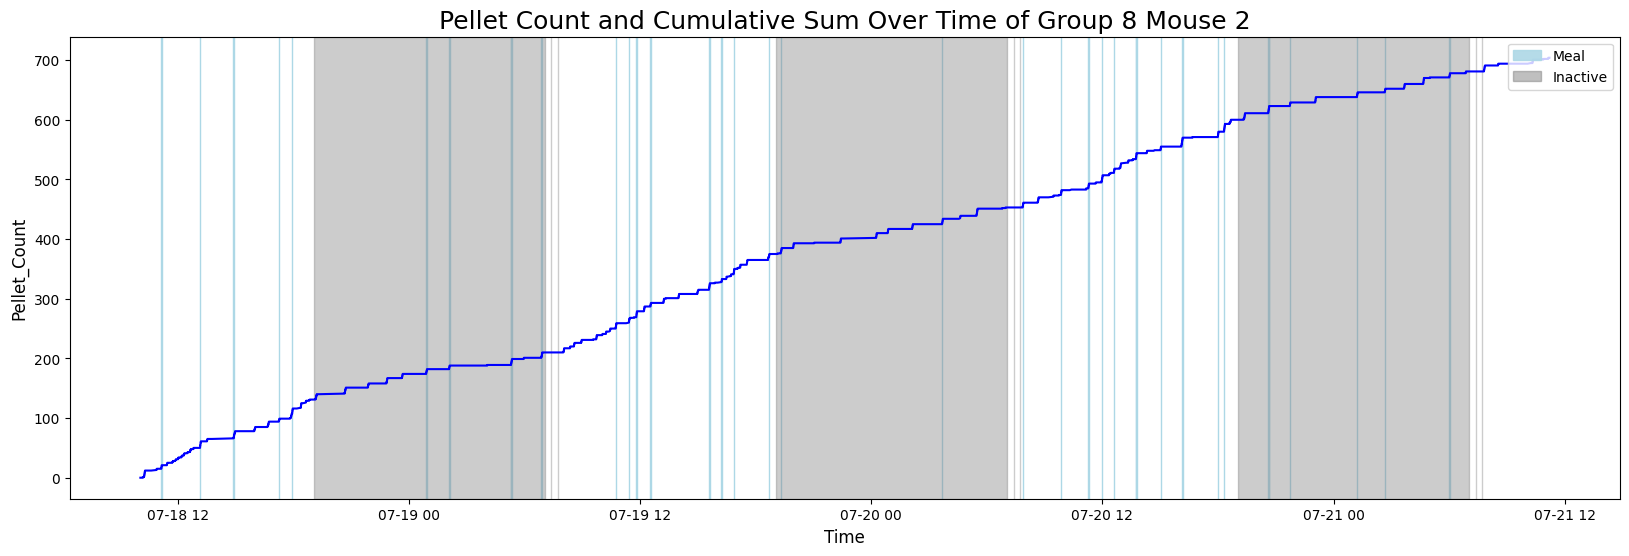

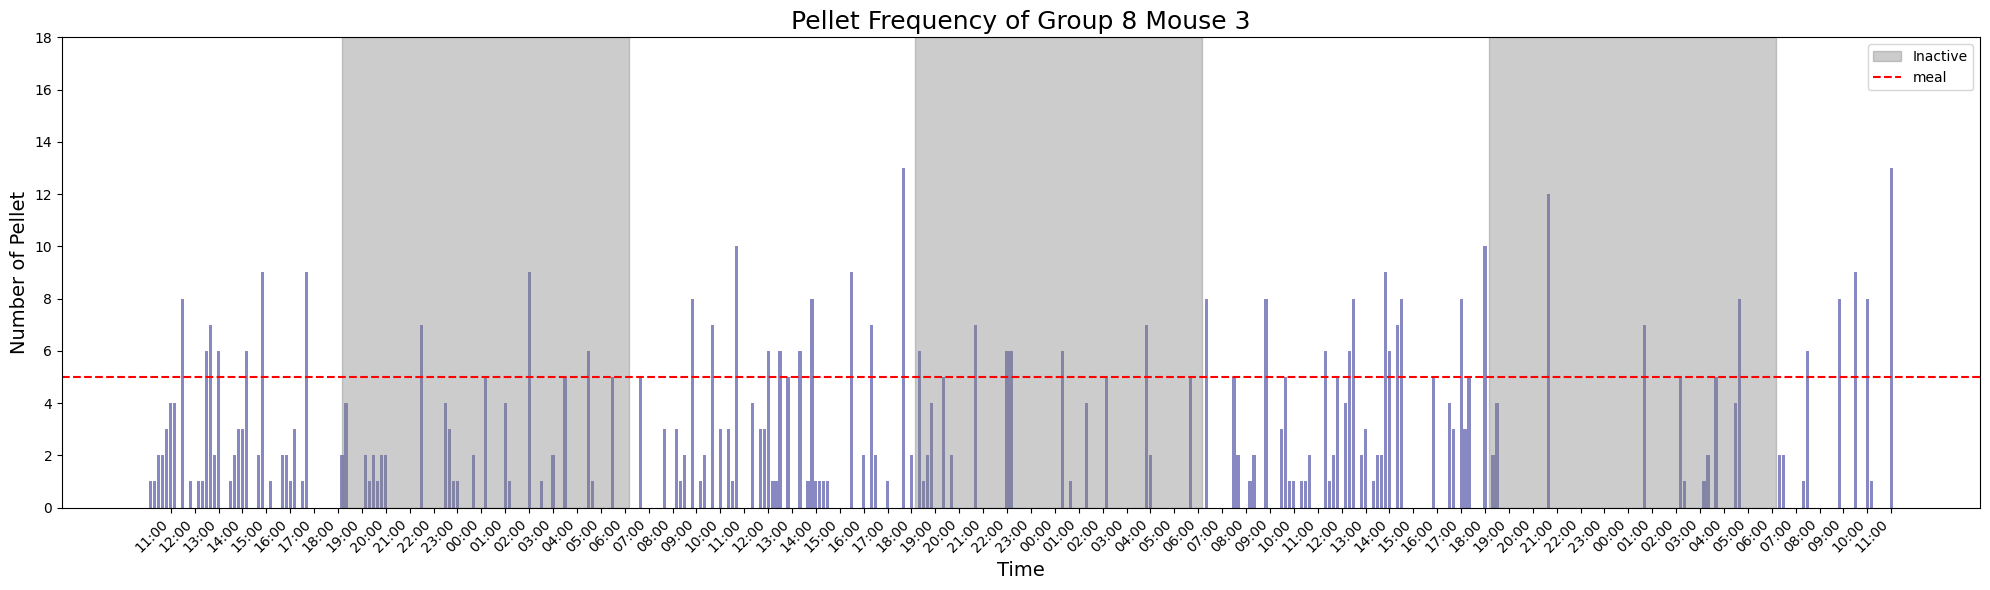

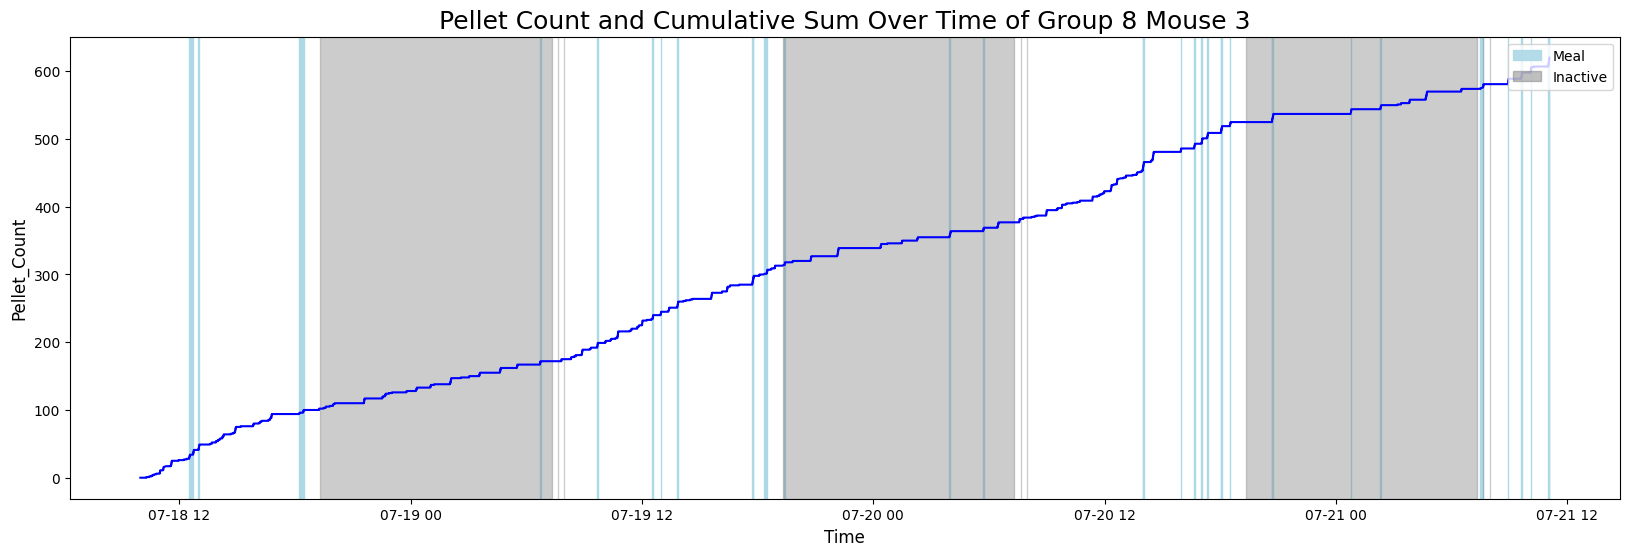

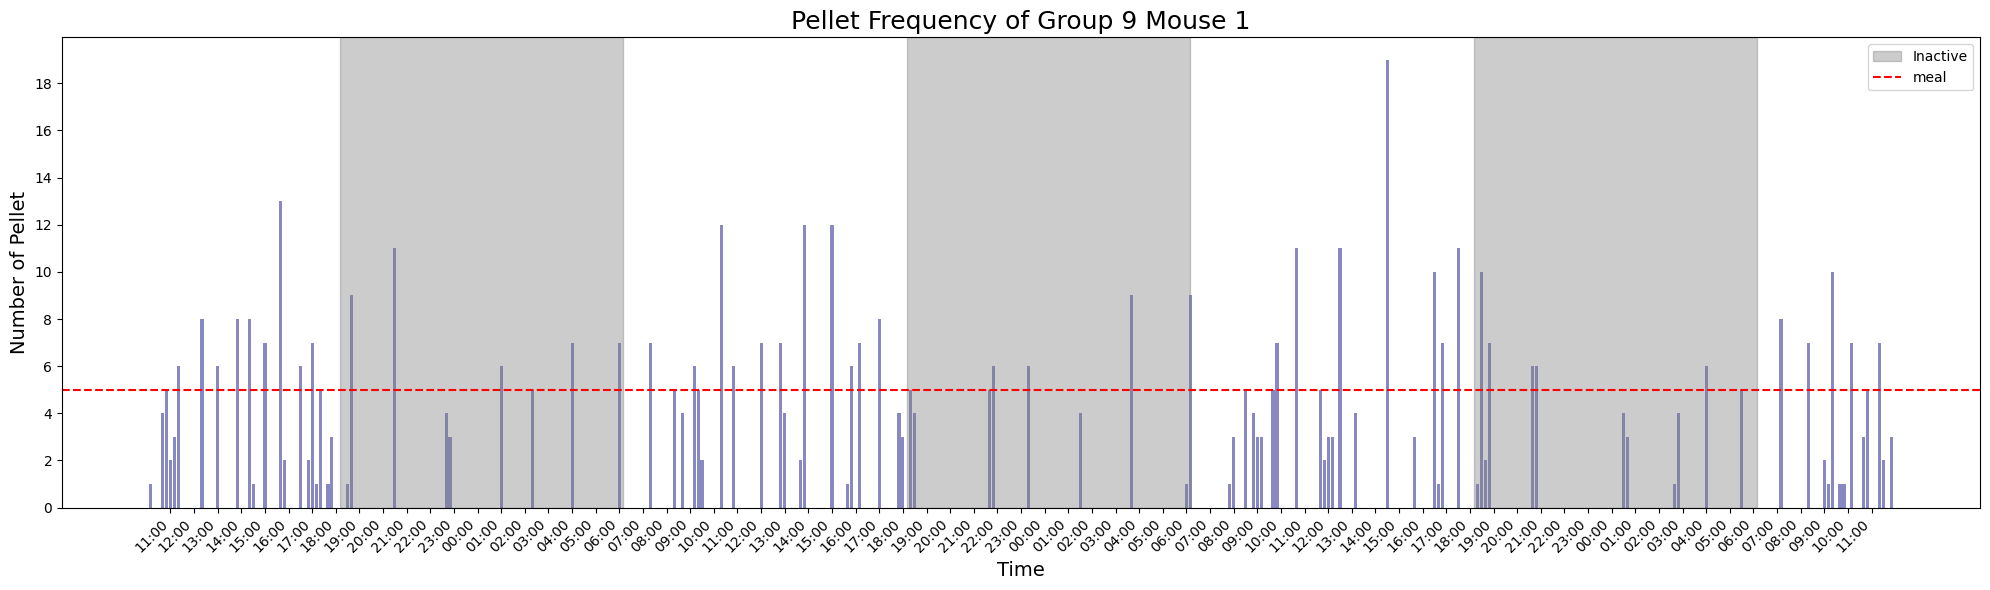

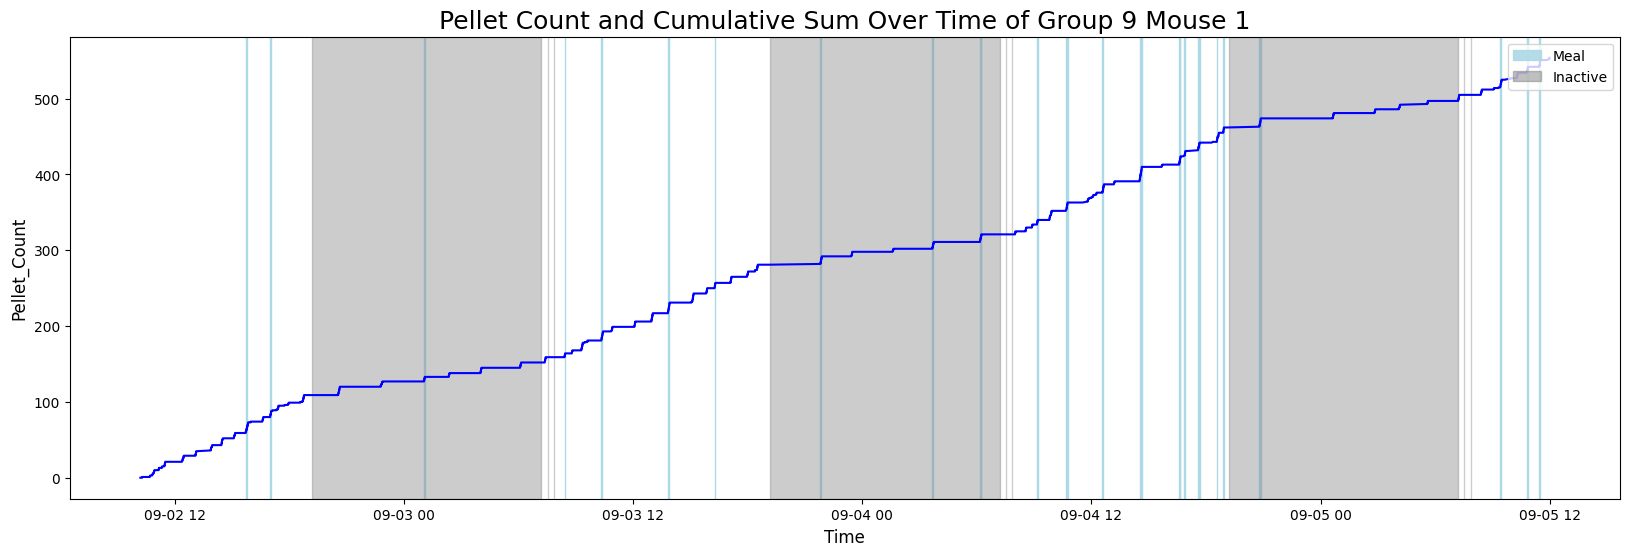

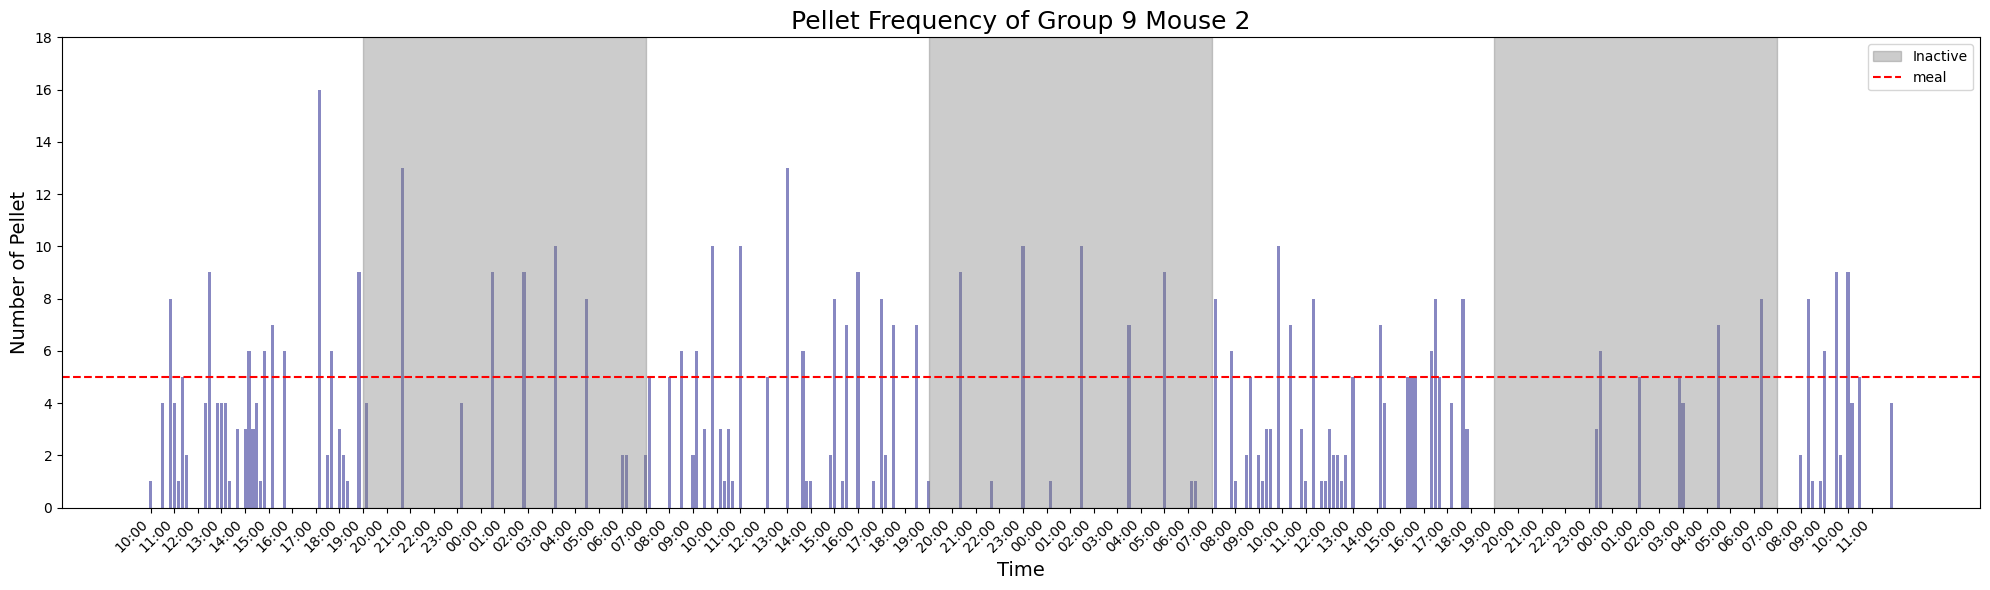

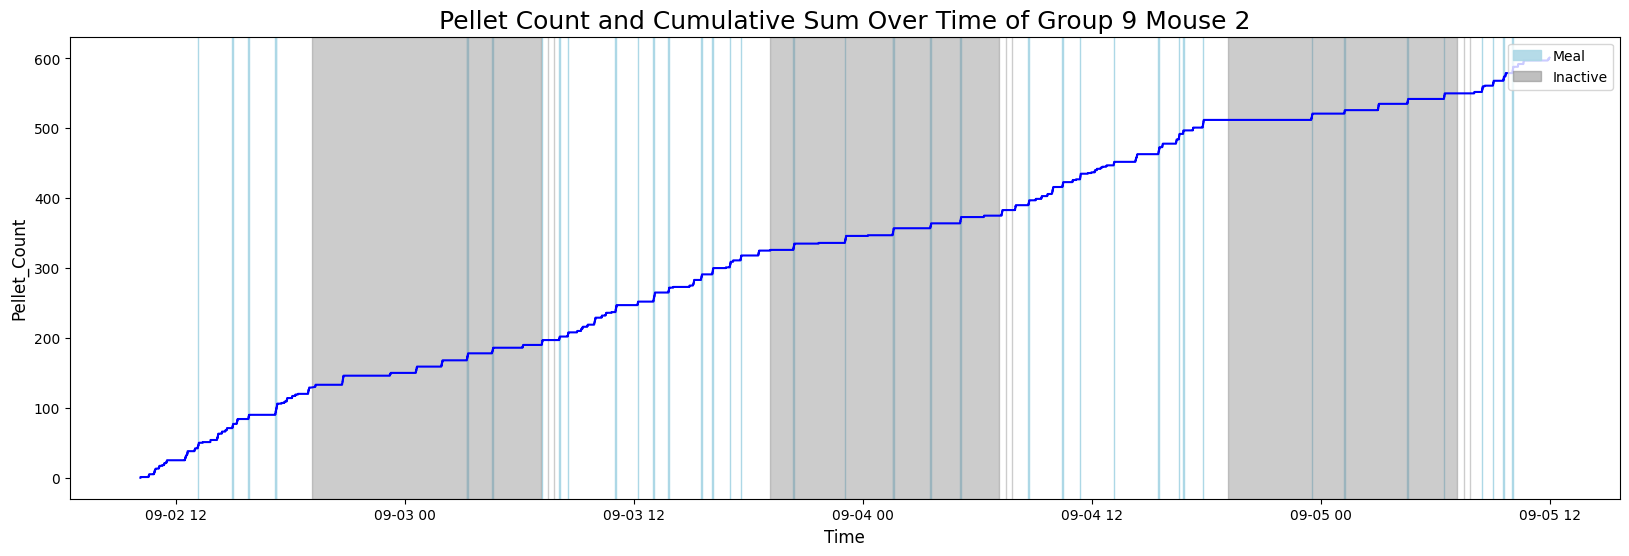

In [3]:
cask_avg_pellet = [] # pellet per hour
cask_dark_meals = [] # percentage of meals in inactive/dark phase
cask_fir_meal = []
flip_cask_meal_count = []

for path in paths.contigency_flip_cask:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    meal = ml.find_meals(data)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    cask_fir_meal.append(meal_1)
    flip_cask_meal_count.append(avg)
    cask_avg_pellet.append(ml.average_pellet(group))
    cask_dark_meals.append(ml.active_meal(meal))

    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import intervals as invs
import warnings

warnings.filterwarnings('ignore')
alpha = 0.1

### Meal Analysis

In [5]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(cask_dark_meals)

#### Inactive and active meal in group

In [6]:
invs.perform_T_test(ctrl_light_meals, ctrl_dark_meals)

P Value is  4.570794544453076e-09
There is a significant difference between the two groups.


In [7]:
invs.perform_T_test(cask_dark_meals, cask_light_meals)

P Value is  8.512716473525514e-18
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [8]:
invs.perform_T_test(flip_ctrl_meal_count, flip_cask_meal_count, test_side='greater')

P Value is  0.023701959358753192
Experiment group is significantly greater than control group


#### Inactive and active meal between group

In [9]:
invs.perform_T_test(ctrl_dark_meals, cask_dark_meals, test_side='less')

P Value is  0.12071407074212262
There is no significant difference between the two groups.


* Mice have significant more meals in their active/day time
* No significant difference in the proportion of inactive meals between control and cask groups

### Average Pellet

Control Size: 6
CASK Size: 14
Control Average: 7.986833333333333
CASK Average: 9.299285714285714
Control Standard Deviation: 0.6854418769426527
CASK Standard Deviation: 1.3477232327477007


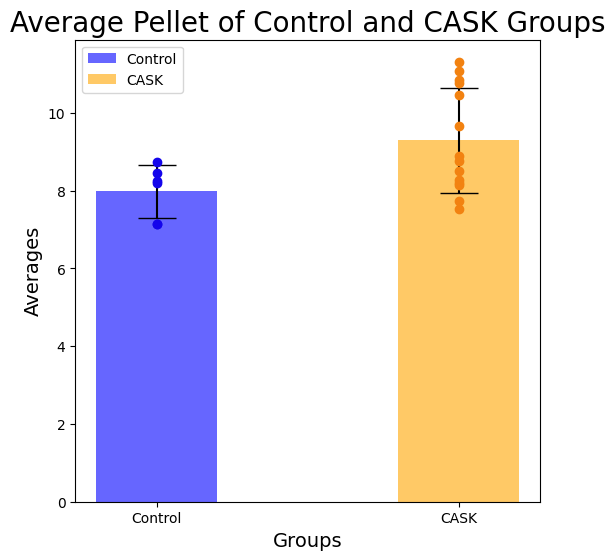

In [10]:
ml.graph_group_stats(ctrl_avg_pellet, cask_avg_pellet, stats_name='Average Pellet', exp_name='CASK')

In [11]:
invs.perform_T_test(ctrl_avg_pellet, cask_avg_pellet, test_side='greater')

P Value is  0.01898857483032484
Experiment group is significantly greater than control group


#### Time needed to start the first meal

Control Size: 6
CASK Size: 14
Control Average: 191.70833333333334
CASK Average: 283.9869047619048
Control Standard Deviation: 190.65876141828772
CASK Standard Deviation: 337.92145987169755


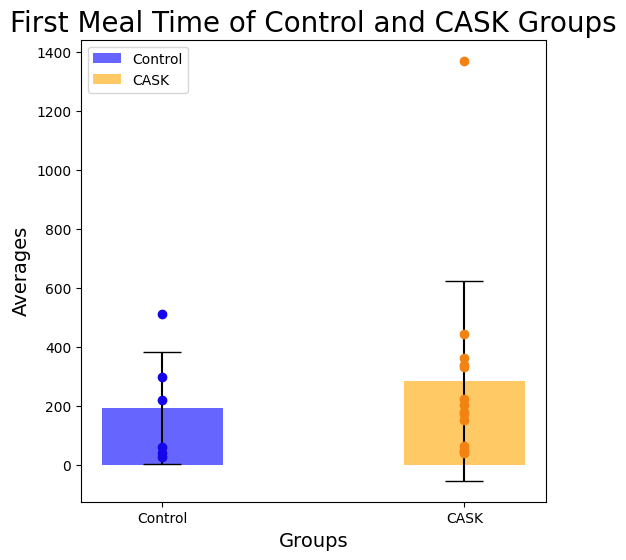

In [12]:
ml.graph_group_stats(ctrl_fir_meal, cask_fir_meal, stats_name='First Meal Time',exp_name='CASK')

In [14]:
invs.perform_T_test(ctrl_fir_meal, cask_fir_meal, test_side='greater')

P Value is  0.27100717890828757
There is no significant difference between the two groups.


* Average Interval also matches the FR1 case that experimental group has larger variance in average intervals.
* no significance difference between all average intervals